# Gulf Coast Weather Prediction
### Cleaning and Visualizing the Gulf Coast Area's Weather Patterns between 2010 - 2019

Our livelihoods are so greatly affected by the weather. Depending on the region someone lives in usually determines the type of weather patterns that they will see on a yearly, monthly or even daily basis. A large majority of industries greatly depend on their region’s weather and climate. For instance, farmers need a good mixture of rain and sunlight so that their crops may grow. Too much sun but not enough rain, may cause issues to their crop yields. Just as too much rain and not enough sun can affect their crop yields as well. Seasonal temperatures factor in as well, as a majority of crops grow based on the daily temperatures. Some may grow better in months that are typically known to have cooler temperatures, while other crops prefer to grow in the warmer months.

History is known to repeat itself on certain occasions but predicting when history will repeat itself, or if it ever will, is an ongoing issue. The best approach is look for patterns of the past while comparing it to patterns of the present. Weather has shown signs of yearly and seasonal patterns but it’s not always set in stone. Just like other factors in our world, weather patterns are changing as well. Global warming has become a hot debate in our culture today as more and more people feel that the certain factors in our environments are raising temperatures around the world which in turn are also raising the temperatures of our oceans, seas and Gulfs. This project isn’t necessarily a global warming, project, but as we go through our historical weather data and try to predict future weather patterns, we will be able to see if there has been a general uptick in temps and see if there is a correlation with any effects it’s having on our data over the years.

Our data is from https://www.ncdc.noaa.gov/ and consists of 5 different datasets for each of our chosen cities. Each one consists of daily weather information for each city saved as a CSV file.

#### Cities used for our datasets
    -New Orleans = New Orleans Airport (New_Orleans.csv)
    -Pascagoula = Pascagoula Lott International Airport (Pascagoula.csv)
    -Houston International Airport (Houston.csv)
    -Mobile = Mobile Downtown Airport (Mobile.csv)
    -Tampa = Tampa International Airport (Tampa.csv)

### Terms and definitions

Dewpoint Average Temperature - temperature where water vapor starts to condense out of the air (the temperature at which air becomes completely saturated). Above this temperature the moisture stays in the air.
                        If the dew-point temperature is close to the dry air temperature -  the relative humidity is high
                        If the dew point is well below the dry air temperature - the relative humidity is low

Humidity(%)- concentration of water vapor present in the air. Water vapor, the gaseous state of water. Humidity indicates the likelihood for precipitation, dew, or fog to be present. The amount of water vapor needed to achieve saturation increases as the temperature increases.

Sealevel_pressure(Hg)- atmospheric pressure at sea level at a given location. When observed at a reporting station that is not at sea level (nearly all stations), it is a correction of the station pressure to sea level. This correction takes into account the standard variation of pressure with height and the influence of temperature variations with height on the pressure. The temperature used in the sea level correction is a twelve hour mean, eliminating diurnal effects.


## Data Cleaning - Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
#import seaborn and set parameters
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('talk')
plt.style.use('fivethirtyeight') # For plots

#import visualizations
import joypy
from matplotlib import cm
import plotly
import plotly_express as px
import plotly.graph_objects as go

In [3]:
# import warnings filter
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [4]:
import warnings
#warnings.simplefilter("ignore", UserWarning)

In [5]:
# Import necessary modules
import glob

# Write the pattern: pattern 
pattern = '*.csv' 

# Save all file matches: csv_files
csv_files = glob.glob(pattern) 

# Create an empty list: frames
frames = [] 

# Iterate over csv_files 
for csv in csv_files: 
    # Read csv into a DataFrame: df 
    df = pd.read_csv(csv) 
    # Append df to frames 
    frames.append(df)

    # Concatenate frames into a single DataFrame: final_df
df = pd.concat(frames)

C:\Users\Jimsyd\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (31,34,41,42,43,46,48,49,51,53,56,58,59,75,76,89) have mixed types.Specify dtype option on import or set low_memory=False.

C:\Users\Jimsyd\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (3,25,26,27,35,36,41,51,53,56,58,59,60,61,63,95,108,114,117,119) have mixed types.Specify dtype option on import or set low_memory=False.

C:\Users\Jimsyd\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (30,31,41,42,43,46,49,51) have mixed types.Specify dtype option on import or set low_memory=False.

C:\Users\Jimsyd\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (41,42,49,51,69,88) have mixed types.Specify dtype option on import or set low_memory=False.

C:\Users\Jimsyd\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (34,41,42,43,

## Data Cleaning and Exploratory Data Analysis (EDA)

We'll 1st take a look at our dataset to get an idea of what we're working with and what steps we need to take to clean our dataframe and prepare it for the rest of our project. 

Our cleaning will consist of dropping unnecessary columns as well as dropping any rows that aren't providing us the information that we're looking for. Find null values and deal with them properly.

In [6]:
#show first 5 rows
df.head()

City    datetime  Dewpoint_temp(°F)  Humidity(%)  Sealevel_pressure(Hg)  \
0  Houston  2010-01-01               35.0         65.0                  30.40   
1  Houston  2010-01-02               32.0         66.0                  30.33   
2  Houston  2010-01-03               35.0         72.0                  30.26   
3  Houston  2010-01-04               29.0         62.0                  30.41   
4  Houston  2010-01-05               26.0         65.0                  30.43   

   Max_temp(°F)  Min_temp(°F)  Average_temp(°F)  Wind_speed(mph)  \
0          56.0          38.0              47.0             26.0   
1          56.0          31.0              44.0             15.0   
2          49.0          37.0              43.0             14.0   
3          48.0          34.0              41.0             25.0   
4          50.0          28.0              39.0             18.0   

   Rainfall(in)  ...  ShortDurationPrecipitationValue120  \
0           0.0  ...                                 NaN   
1           0.0  ...                                 NaN   
2           0.0  ...                                 NaN   
3           0.0  ...                                 NaN   
4           0.0  ...                                 NaN   

   ShortDurationPrecipitationValue150  ShortDurationPrecipitationValue180  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4                                 NaN                                 NaN   

  Sunrise  Sunset  TStorms WindEquipmentChangeDate DailyDewPoint  \
0     NaN     NaN      NaN                     NaN           NaN   
1     NaN     NaN      NaN                     NaN           NaN   
2     NaN     NaN      NaN                     NaN           NaN   
3     NaN     NaN      NaN                     NaN           NaN   
4     NaN     NaN      NaN                     NaN           NaN   

   DailyRelativeHumidity DeailySeaLevelPressure  
0                    NaN                    NaN  
1                    NaN                    NaN  
2                    NaN                    NaN  
3                    NaN                    NaN  
4                    NaN                    NaN  

[5 rows x 141 columns]

In [7]:
#list all column names
list(df.keys())

['City',
 'datetime',
 'Dewpoint_temp(°F)',
 'Humidity(%)',
 'Sealevel_pressure(Hg)',
 'Max_temp(°F)',
 'Min_temp(°F)',
 'Average_temp(°F)',
 'Wind_speed(mph)',
 'Rainfall(in)',
 'Rain or Not',
 'Day',
 'Week',
 'Month_Name',
 'Year',
 'STATION',
 'REPORT_TYPE',
 'SOURCE',
 'AWND',
 'BackupDirection',
 'BackupDistance',
 'BackupDistanceUnit',
 'BackupElements',
 'BackupElevation',
 'BackupElevationUnit',
 'BackupEquipment',
 'BackupLatitude',
 'BackupLongitude',
 'BackupName',
 'CDSD',
 'CLDD',
 'DSNW',
 'DailyAverageDewPointTemperature',
 'DailyAverageDryBulbTemperature',
 'DailyAverageRelativeHumidity',
 'DailyAverageSeaLevelPressure',
 'DailyAverageStationPressure',
 'DailyAverageWetBulbTemperature',
 'DailyAverageWindSpeed',
 'DailyCoolingDegreeDays',
 'DailyDepartureFromNormalAverageTemperature',
 'DailyHeatingDegreeDays',
 'DailyMaximumDryBulbTemperature',
 'DailyMinimumDryBulbTemperature',
 'DailyPeakWindDirection',
 'DailyPeakWindSpeed',
 'DailyPrecipitation',
 'DailySnowDepth'

In [8]:
#get number of rows and columns
df.shape

(699929, 141)

In [9]:
#additional info about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699929 entries, 0 to 135984
Columns: 141 entries, City to DeailySeaLevelPressure
dtypes: float64(75), object(66)
memory usage: 758.3+ MB


In [10]:
#statistical description, only for numeric values
df.describe()

Dewpoint_temp(°F)   Humidity(%)  Sealevel_pressure(Hg)  Max_temp(°F)  \
count       54729.000000  54729.000000           54729.000000  54729.000000   
mean           60.499926     73.628929              30.049150     79.980266   
std            13.934575     11.397269               0.140396     12.198478   
min             4.708333     21.000000              29.440000     31.000000   
25%            52.000000     67.000000              29.960000     72.000000   
50%            64.500000     75.000000              30.035833     82.000000   
75%            72.000000     82.000000              30.130000     90.000000   
max            80.000000    100.000000              30.695417    109.000000   

       Min_temp(°F)  Average_temp(°F)  Wind_speed(mph)  Rainfall(in)  \
count  54729.000000      54729.000000     54729.000000  54729.000000   
mean      61.407170         70.944581        22.768459      0.159897   
std       14.031103         12.746456         6.947008      0.523263   
min       16.000000         26.000000         0.000000      0.000000   
25%       51.000000         62.000000        18.000000      0.000000   
50%       65.000000         74.000000        22.000000      0.000000   
75%       74.000000         82.000000        26.000000      0.030000   
max       85.000000         95.000000       120.000000     16.070000   

        Rain or Not           Day  ...  ShortDurationPrecipitationValue045  \
count  18243.000000  18243.000000  ...                          535.000000   
mean       0.312175     15.714795  ...                            0.945196   
std        0.463393      8.792617  ...                            0.608570   
min        0.000000      1.000000  ...                            0.010000   
25%        0.000000      8.000000  ...                            0.480000   
50%        0.000000     16.000000  ...                            0.840000   
75%        1.000000     23.000000  ...                            1.270000   
max        1.000000     31.000000  ...                            3.920000   

       ShortDurationPrecipitationValue080  ShortDurationPrecipitationValue100  \
count                          535.000000                          535.000000   
mean                             1.131140                            1.202056   
std                              0.746828                            0.803310   
min                              0.010000                            0.010000   
25%                              0.570000                            0.610000   
50%                              0.990000                            1.060000   
75%                              1.530000                            1.605000   
max                              5.660000                            6.170000   

       ShortDurationPrecipitationValue150       Sunrise        Sunset  \
count                          535.000000  18243.000000  18243.000000   
mean                             1.318542    584.181878   1801.341227   
std                              0.879588     71.216328     74.977100   
min                              0.010000    449.000000   1651.000000   
25%                              0.695000    529.000000   1736.000000   
50%                              1.170000    601.000000   1816.000000   
75%                              1.760000    639.000000   1852.000000   
max                              7.180000    723.000000   1931.000000   

       TStorms  DailyDewPoint  DailyRelativeHumidity  DeailySeaLevelPressure  
count      0.0  119872.000000          119872.000000           119969.000000  
mean       NaN      60.949764              79.421171               30.054904  
std        NaN      14.019383              11.781612                0.140518  
min        NaN       4.708333              34.240000               29.464167  
25%        NaN      52.958333              72.680000               29.970000  
50%        NaN      64.640000              81.200000               30.043750  
75

In [11]:
#Convert string DATE into readable datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

In [12]:
#create dataframe with columns that we'll be using
df = df[['STATION',
         'datetime',
         'REPORT_TYPE',
         'DailyDewPoint',
         'DailyRelativeHumidity',
         'DeailySeaLevelPressure',
         'DailyAverageDewPointTemperature',
         'DailyAverageRelativeHumidity',
         'DailyAverageSeaLevelPressure',
         'DailyMaximumDryBulbTemperature',
         'DailyMinimumDryBulbTemperature',
         'DailyAverageDryBulbTemperature',
         'DailyPeakWindSpeed',
         'DailyPrecipitation'
        ]]

In [13]:
#Clean up our column names. DA = Daily Average. Temps are in 
df = df.rename(columns = {'STATION':'City',
                          'DATE': 'Date',
                          'REPORT_TYPE': 'Report_type',
                          'DailyAverageDewPointTemperature':'Dewpoint_temp(°F)',
                          'DailyAverageDryBulbTemperature': 'Average_temp(°F)',
                          'DailyAverageRelativeHumidity': 'Humidity(%)',
                          'DailyAverageSeaLevelPressure': 'Sealevel_pressure(Hg)',
                          'DailyMaximumDryBulbTemperature': 'Max_temp(°F)',
                          'DailyMinimumDryBulbTemperature': 'Min_temp(°F)',
                          'DailyPeakWindSpeed': 'Wind_speed(mph)',
                          'DailyPrecipitation': 'Rainfall(in)'})

In [14]:
#To make things easier to follow we'll replace the Station IDs with the name of their corresponding cities
df = df.replace({'City': {72231012916:'New_Orleans', 72223513838:'Mobile', 72243012960:'Houston', 74768853858:'Pascagoula', 72211012842:'Tampa'}})
df

City   datetime Report_type  DailyDewPoint  DailyRelativeHumidity  \
0         NaN 2010-01-01         NaN            NaN                    NaN   
1         NaN 2010-01-02         NaN            NaN                    NaN   
2         NaN 2010-01-03         NaN            NaN                    NaN   
3         NaN 2010-01-04         NaN            NaN                    NaN   
4         NaN 2010-01-05         NaN            NaN                    NaN   
...       ...        ...         ...            ...                    ...   
135980  Tampa 2019-12-31       FM-12            NaN                    NaN   
135981  Tampa 2019-12-31       FM-15            NaN                    NaN   
135982  Tampa 2019-12-31       FM-15            NaN                    NaN   
135983  Tampa 2019-12-31       SOD              NaN                    NaN   
135984  Tampa 2019-12-31       SOM              NaN                    NaN   

        DeailySeaLevelPressure  Dewpoint_temp(°F)  Humidity(%)  \
0                          NaN                NaN          NaN   
1                          NaN                NaN          NaN   
2                          NaN                NaN          NaN   
3                          NaN                NaN          NaN   
4                          NaN                NaN          NaN   
...                        ...                ...          ...   
135980                     NaN                NaN          NaN   
135981                     NaN                NaN          NaN   
135982                     NaN                NaN          NaN   
135983                     NaN               46.0         57.0   
135984                     NaN                NaN          NaN   

        Sealevel_pressure(Hg)  Max_temp(°F)  Min_temp(°F)  Average_temp(°F)  \
0                         NaN           NaN           NaN               NaN   
1                         NaN           NaN           NaN               NaN   
2                         NaN           NaN           NaN               NaN   
3                         NaN           NaN           NaN               NaN   
4                         NaN           NaN           NaN               NaN   
...                       ...           ...           ...               ...   
135980                    NaN           NaN           NaN               NaN   
135981                    NaN           NaN           NaN               NaN   
135982                    NaN           NaN           NaN               NaN   
135983                  30.08          71.0          56.0              64.0   
135984                    NaN           NaN           NaN               NaN   

       Wind_speed(mph) Rainfall(in)  
0                  NaN          NaN  
1                  NaN          NaN  
2                  NaN          NaN  
3                  NaN          NaN  
4                  NaN          NaN  
...                ...          ...  
135980             NaN          NaN  
135981             NaN          NaN  
135982             NaN          NaN  
135983              17         0.00  
135984             NaN          NaN  

[699929 rows x 14 columns]

Total    Percent
Dewpoint_temp(°F)       685672  97.963079
Sealevel_pressure(Hg)   685669  97.962650
Humidity(%)             685595  97.952078
Wind_speed(mph)         681783  97.407451
Rainfall(in)            681713  97.397450
Average_temp(°F)        681712  97.397307
Min_temp(°F)            681711  97.397165
Max_temp(°F)            681710  97.397022
DailyRelativeHumidity   580057  82.873691
DailyDewPoint           580057  82.873691
DeailySeaLevelPressure  579960  82.859833
Report_type              54729   7.819222
City                     54729   7.819222
datetime                     0   0.000000

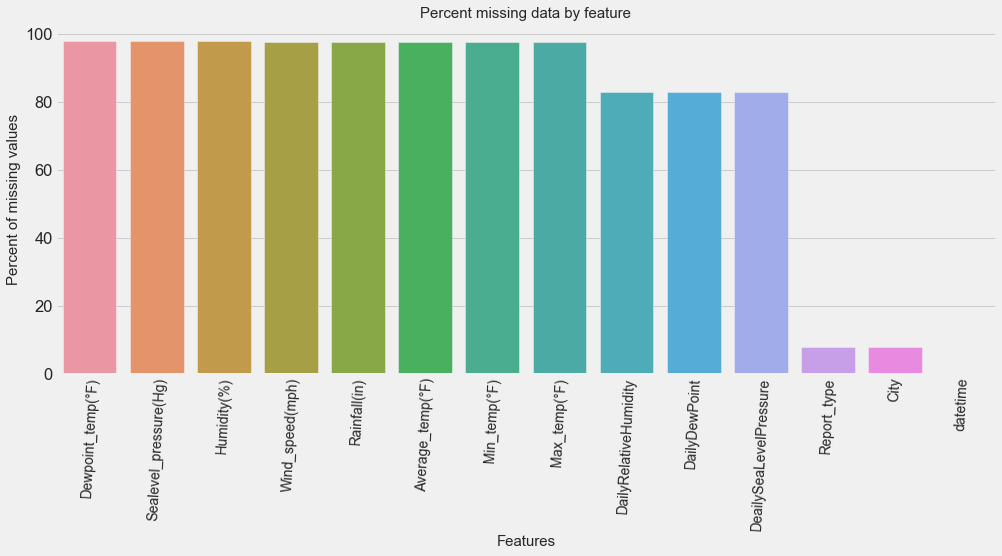

In [15]:
#check the null values 
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

#show visual results of missing data
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='87', fontsize=14)
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

missing_data

In [16]:
#count unique values in a column
df['Rainfall(in)'].value_counts(dropna=False)

NaN     681713
0.00      8598
0.0       2345
T         1584
0.01       393
         ...  
1.96         1
2.1          1
4.03         1
2.89         1
3.72         1
Name: Rainfall(in), Length: 551, dtype: int64

In [17]:
#our datasets came with it's own filter so that we can easily seperate the rows that have the daily data that we'll focus on
#First we have to make sure that we'll be able to filter the variable properly by making sure the values are listed correctly
list(df['Report_type'].unique())

[nan, 'FM-12', 'FM-15', 'FM-16', 'SOD  ', 'SOM  ', 'SY-MT', 'AUTO ']

In [18]:
#we see that SOD has a space added at the end so we'll take that out before filter our data set
df['Report_type'] = df['Report_type'].replace('SOD  ', 'SOD')

In [19]:
#Now we can sort our dataframe by the rows that contain only data consisting of daily averages SOD = Statistics of Day
df = df.loc[df['Report_type'] == 'SOD']
df

City   datetime Report_type  DailyDewPoint  DailyRelativeHumidity  \
30      Houston 2010-01-01         SOD            NaN                    NaN   
59      Houston 2010-01-02         SOD            NaN                    NaN   
88      Houston 2010-01-03         SOD            NaN                    NaN   
119     Houston 2010-01-04         SOD            NaN                    NaN   
148     Houston 2010-01-05         SOD            NaN                    NaN   
...         ...        ...         ...            ...                    ...   
135795    Tampa 2019-12-27         SOD            NaN                    NaN   
135847    Tampa 2019-12-28         SOD            NaN                    NaN   
135898    Tampa 2019-12-29         SOD            NaN                    NaN   
135949    Tampa 2019-12-30         SOD            NaN                    NaN   
135983    Tampa 2019-12-31         SOD            NaN                    NaN   

        DeailySeaLevelPressure  Dewpoint_temp(°F)  Humidity(%)  \
30                         NaN               35.0         65.0   
59                         NaN               32.0         66.0   
88                         NaN               35.0         72.0   
119                        NaN               29.0         62.0   
148                        NaN               26.0         65.0   
...                        ...                ...          ...   
135795                     NaN               65.0         78.0   
135847                     NaN               67.0         80.0   
135898                     NaN               69.0         83.0   
135949                     NaN               68.0         83.0   
135983                     NaN               46.0         57.0   

        Sealevel_pressure(Hg)  Max_temp(°F)  Min_temp(°F)  Average_temp(°F)  \
30                      30.40          56.0          38.0              47.0   
59                      30.33          56.0          31.0              44.0   
88                      30.26          49.0          37.0              43.0   
119                     30.41          48.0          34.0              41.0   
148                     30.43          50.0          28.0              39.0   
...                       ...           ...           ...               ...   
135795                  30.10          77.0          67.0              72.0   
135847                  30.05          80.0          69.0              75.0   
135898                  30.00          81.0          72.0              77.0   
135949                  29.97          77.0          70.0              74.0   
135983                  30.08          71.0          56.0              64.0   

       Wind_speed(mph) Rainfall(in)  
30                  26         0.00  
59                  15         0.00  
88                  14            T  
119                 25         0.00  
148                 18         0.00  
...                ...          ...  
135795              23            T  
135847              21         0.32  
135898              20         0.07  
135949              22         0.00  
135983              17         0.00  

[18243 rows x 14 columns]

In [20]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

City - 0.0%
datetime - 0.0%
Report_type - 0.0%
DailyDewPoint - 80.0%
DailyRelativeHumidity - 80.0%
DeailySeaLevelPressure - 80.0%
Dewpoint_temp(°F) - 22.0%
Humidity(%) - 21.0%
Sealevel_pressure(Hg) - 22.0%
Max_temp(°F) - 0.0%
Min_temp(°F) - 0.0%
Average_temp(°F) - 0.0%
Wind_speed(mph) - 1.0%
Rainfall(in) - 0.0%


Some of our values are still coming up with missing values due to our dataset needing a bit more fine tuning before it's ready. For our previous cleaning, we found that the Mobile dataset didn't have valid "SOD" values in these variables. We can easily fix this issue by using hourly values that we already assigned to other variables. We'll use these variables to fill in the missing variables.

In [21]:
#fill missing values in DailyAverageDewPointTemperature with values from DailyDewPoint
df['Dewpoint_temp(°F)'].fillna(df.DailyDewPoint, inplace=True)

#fill missing values in DailyAverageRelativeHumidity with values from DailyRelativeHumidity
df['Humidity(%)'].fillna(df.DailyRelativeHumidity, inplace=True)

#fill missing values in DailyAverageSeaLevelPressure with values from DeailySeaLevelPressure
df['Sealevel_pressure(Hg)'].fillna(df.DeailySeaLevelPressure, inplace=True)

#drop the variables we no longer need
df = df.drop(['DailyDewPoint', 'DailyRelativeHumidity', 'DeailySeaLevelPressure'], axis=1)

df.loc[df['City'] == 'Mobile'].head(3)

C:\Users\Jimsyd\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



City   datetime Report_type  Dewpoint_temp(°F)  Humidity(%)  \
28  Mobile 2010-01-01         SOD          37.000000    69.964286   
53  Mobile 2010-01-02         SOD          26.166667    60.875000   
78  Mobile 2010-01-03         SOD          18.208333    53.875000   

    Sealevel_pressure(Hg)  Max_temp(°F)  Min_temp(°F)  Average_temp(°F)  \
28              30.244583          53.0          36.0              45.0   
53              30.327083          50.0          30.0              40.0   
78              30.281250          44.0          28.0              36.0   

   Wind_speed(mph) Rainfall(in)  
28              31         0.01  
53              22            0  
78              18            0

In [22]:
#we no longer need the Report_type column either
df = df.drop('Report_type', axis=1)

In [23]:
#We'll now focus on filling any missing values. We'll use a forward fill method to fill the missing values
df = df.fillna(method='ffill')

In [24]:
#recheck our dataset for null values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

City - 0.0%
datetime - 0.0%
Dewpoint_temp(°F) - 0.0%
Humidity(%) - 0.0%
Sealevel_pressure(Hg) - 0.0%
Max_temp(°F) - 0.0%
Min_temp(°F) - 0.0%
Average_temp(°F) - 0.0%
Wind_speed(mph) - 0.0%
Rainfall(in) - 0.0%


### EDA
Define a function, that takes our data as an input, and returns a dataframe where each feature in my data set is now a row and the summary statistics are columns. This way we can evaluate our datasets by inspecting datatypes, identify null values(which should now be zero). Along with exploring the summary statistics for each column available. 

In [25]:
#Now that we've cleaned up our dataset we can take another look at the dataset
def ames_eda(df): 
    eda_df = {}
    eda_df['null_sum'] = df.isnull().sum()
    eda_df['null_pct'] = df.isnull().mean()
    eda_df['dtypes'] = df.dtypes
    eda_df['count'] = df.count()
    eda_df['mean'] = df.mean()
    eda_df['median'] = df.median()
    eda_df['std'] = df.std()
    eda_df['min'] = df.min()
    eda_df['max'] = df.max()
    return pd.DataFrame(eda_df)

ames_eda(df)

null_sum  null_pct          dtypes  count       mean  \
Average_temp(°F)              0       0.0         float64  18243  70.944581   
City                          0       0.0          object  18243        NaN   
Dewpoint_temp(°F)             0       0.0         float64  18243  60.499926   
Humidity(%)                   0       0.0         float64  18243  73.628929   
Max_temp(°F)                  0       0.0         float64  18243  79.980266   
Min_temp(°F)                  0       0.0         float64  18243  61.407170   
Rainfall(in)                  0       0.0          object  18243        NaN   
Sealevel_pressure(Hg)         0       0.0         float64  18243  30.049150   
Wind_speed(mph)               0       0.0          object  18243        NaN   
datetime                      0       0.0  datetime64[ns]  18243        NaN   

                          median        std                  min  \
Average_temp(°F)       74.000000  12.746689                   26   
City                         NaN        NaN              Houston   
Dewpoint_temp(°F)      64.500000  13.934829              4.70833   
Humidity(%)            75.000000  11.397478                   21   
Max_temp(°F)           82.000000  12.198700                   31   
Min_temp(°F)           65.000000  14.031359                   16   
Rainfall(in)                 NaN        NaN                  NaN   
Sealevel_pressure(Hg)  30.035833   0.140398                29.44   
Wind_speed(mph)              NaN        NaN                  NaN   
datetime                     NaN        NaN  2010-01-01 00:00:00   

                                       max  
Average_temp(°F)                        95  
City                                 Tampa  
Dewpoint_temp(°F)                       80  
Humidity(%)                            100  
Max_temp(°F)                           109  
Min_temp(°F)                            85  
Rainfall(in)                           NaN  
Sealevel_pressure(Hg)              30.6954  
Wind_speed(mph)                        NaN  
datetime               2019-12-31 00:00:00

By looking at these results we can see there's a major outlier in the wind_speed column. 2237mph winds would be devestating records. More than likely it's an error so we'll find these outliers and correct them. We also will need to figure out why Rainfall and Wind_speed aren't showing as float65 dtypes.

In [26]:
#make any replacements and convert Rainfall to float
df['Rainfall(in)'] = df['Rainfall(in)'].replace('T', 0.00)
df['Rainfall(in)'] = df['Rainfall(in)'].replace('0.00s', 0.00)
df['Rainfall(in)'] = df['Rainfall(in)'].astype(float)

In [27]:
#make any replacements and convert Rainfall to float
df['Wind_speed(mph)'] = df['Wind_speed(mph)'].replace('*', 15)
df['Wind_speed(mph)'] = df['Wind_speed(mph)'].replace('20s', 20)
df['Wind_speed(mph)'] = df['Wind_speed(mph)'].replace('36s', 36)
df['Wind_speed(mph)'] = df['Wind_speed(mph)'].astype(float)

In [28]:
#quick search to see how many times our outliers appear
df.loc[df['Wind_speed(mph)'] > 100]

City   datetime  Dewpoint_temp(°F)  Humidity(%)  \
4064        Mobile 2010-05-09          46.000000    46.833333   
42400       Mobile 2013-08-08          77.071429    80.285714   
3951    Pascagoula 2010-04-26          58.000000    88.000000   
115817  Pascagoula 2018-05-27          68.000000    68.000000   
115851  Pascagoula 2018-05-28          69.000000    74.000000   
70700        Tampa 2015-03-24          61.000000    71.000000   
76023        Tampa 2015-08-20          75.000000    74.000000   

        Sealevel_pressure(Hg)  Max_temp(°F)  Min_temp(°F)  Average_temp(°F)  \
4064                 30.19875          80.0          56.0              68.0   
42400                29.95875          92.0          77.0              85.0   
3951                 29.73000          79.0          60.0              70.0   
115817               29.81000          91.0          71.0              81.0   
115851               29.71000          86.0          72.0              79.0   
70700                30.05000          79.0          67.0              73.0   
76023                30.01000          96.0          79.0              88.0   

        Wind_speed(mph)  Rainfall(in)  
4064              120.0           0.0  
42400             114.0           0.0  
3951             2237.0           0.0  
115817           2237.0           0.0  
115851           2237.0           0.0  
70700            2237.0           0.0  
76023            2237.0           0.0

In [29]:
#nothing in the data suggets that it was a stormy day or reason for a high wind speed so we'll set it to O
df['Wind_speed(mph)'] = df['Wind_speed(mph)'].replace(2237, 0)

In [30]:
#now that we've cleaned up the data as a whole we can re-look at the data in terms of our cities

#Houston
houston = df.loc[df['City'] == 'Houston']

#New Orleans
new_orleans = df.loc[df['City'] == 'New_Orleans']

#Pascagoula
pascagoula = df.loc[df['City'] == 'Pascagoula']

#Mobile
mobile = df.loc[df['City'] == 'Mobile']

#Tampa
tampa = df.loc[df['City'] == 'Tampa']

## Creating new timeseries columns

Time plays an important role in our project. Our dataset consists of data compiled over 10 years with each year being able to be broken down into months, weeks, days. To do this, we'll create variables that represent these timestamps.

In [31]:
#to help better visualize our dataset we'll add timeseries columns this way we can better look at our data through various criterias
df_time = df.copy()
df_time['Day'] = df_time['datetime'].dt.day
df_time['Week'] = df_time['datetime'].dt.week
df_time['Month_Name'] = df_time['datetime'].dt.month_name()
df_time['Year'] = df_time['datetime'].dt.year

df_time.head()

City   datetime  Dewpoint_temp(°F)  Humidity(%)  \
30   Houston 2010-01-01               35.0         65.0   
59   Houston 2010-01-02               32.0         66.0   
88   Houston 2010-01-03               35.0         72.0   
119  Houston 2010-01-04               29.0         62.0   
148  Houston 2010-01-05               26.0         65.0   

     Sealevel_pressure(Hg)  Max_temp(°F)  Min_temp(°F)  Average_temp(°F)  \
30                   30.40          56.0          38.0              47.0   
59                   30.33          56.0          31.0              44.0   
88                   30.26          49.0          37.0              43.0   
119                  30.41          48.0          34.0              41.0   
148                  30.43          50.0          28.0              39.0   

     Wind_speed(mph)  Rainfall(in)  Day  Week Month_Name  Year  
30              26.0           0.0    1    53    January  2010  
59              15.0           0.0    2    53    January  2010  
88              14.0           0.0    3    53    January  2010  
119             25.0           0.0    4     1    January  2010  
148             18.0           0.0    5     1    January  2010

In [32]:
#create individual dataframes for our cities using our timeseries dataframe
#Houston
houston_time = df_time.loc[df['City'] == 'Houston']

#New Orleans
new_orleans_time = df_time.loc[df['City'] == 'New_Orleans']

#Pascagoula
pascagoula_time = df_time.loc[df['City'] == 'Pascagoula']

#Mobile
mobile_time = df_time.loc[df['City'] == 'Mobile']

#Tampa
tampa_time = df_time.loc[df['City'] == 'Tampa']

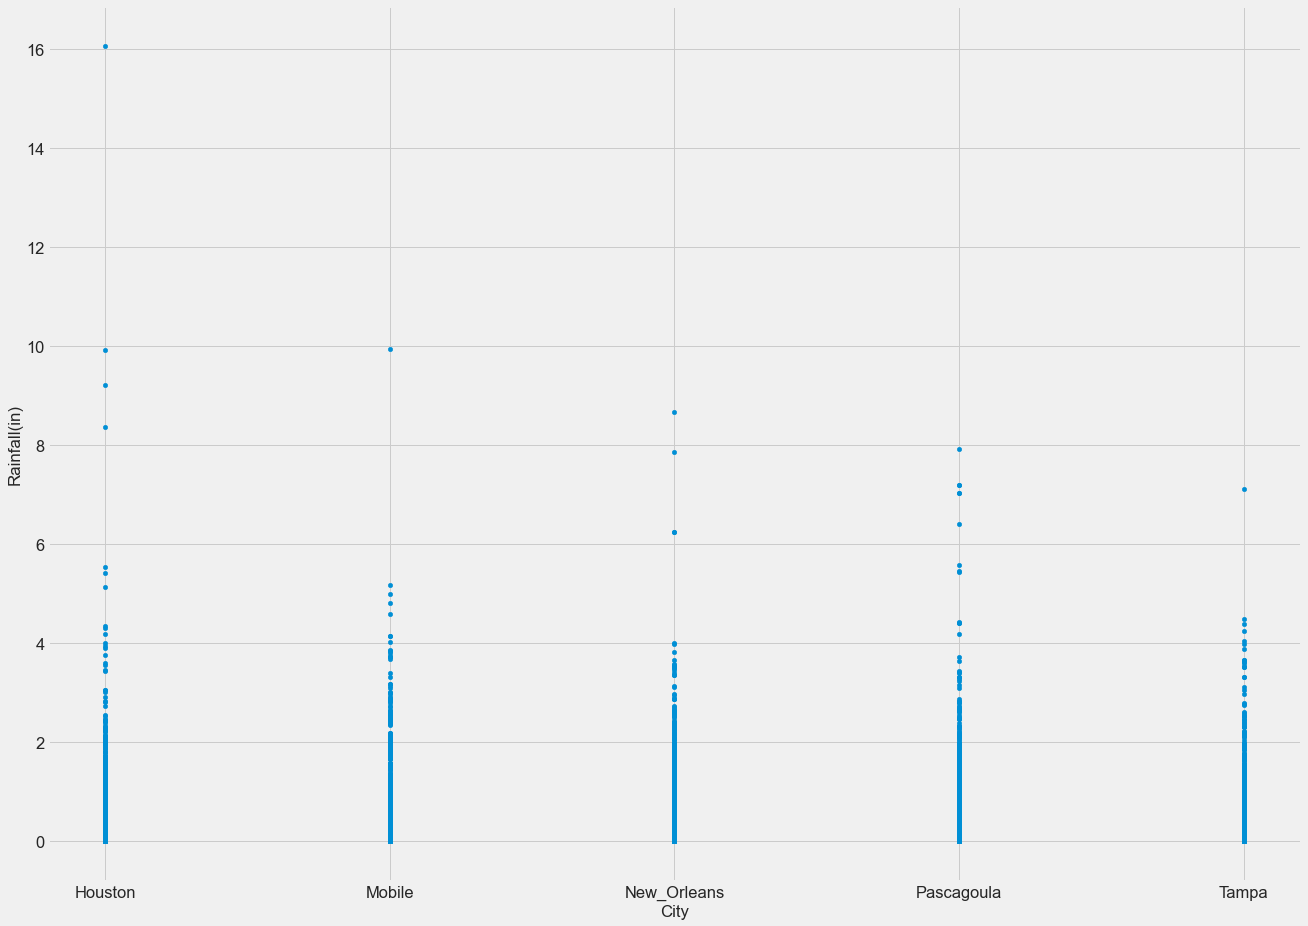

In [33]:
df_time.plot(kind='scatter', x='City', y='Rainfall(in)', figsize=(20,15))

### Exploring any relationships with a target of Rainfall(in)

Being able to predict rainfall has been a common want for centuries. For our project we'll use our other variables to see if we can find a relationship between them and rainfall.

Pandas' corrwith method will return a pair-wise correlation for each numeric variable with the target and ignore non-numeric columns.

Using seaborn, we can visualize these pair-wise correlations. For ease of analysis, the code below sorts the pair-wise correlations by absolute value.

In [34]:
#create a new dataframe for Rainfall
df_rainfall = df.copy()

#create a new column to show rain(1) or no rain(0) days
df_rainfall['Rain or Not'] = np.where(df_rainfall['Rainfall(in)'] > 0, 1, 0)

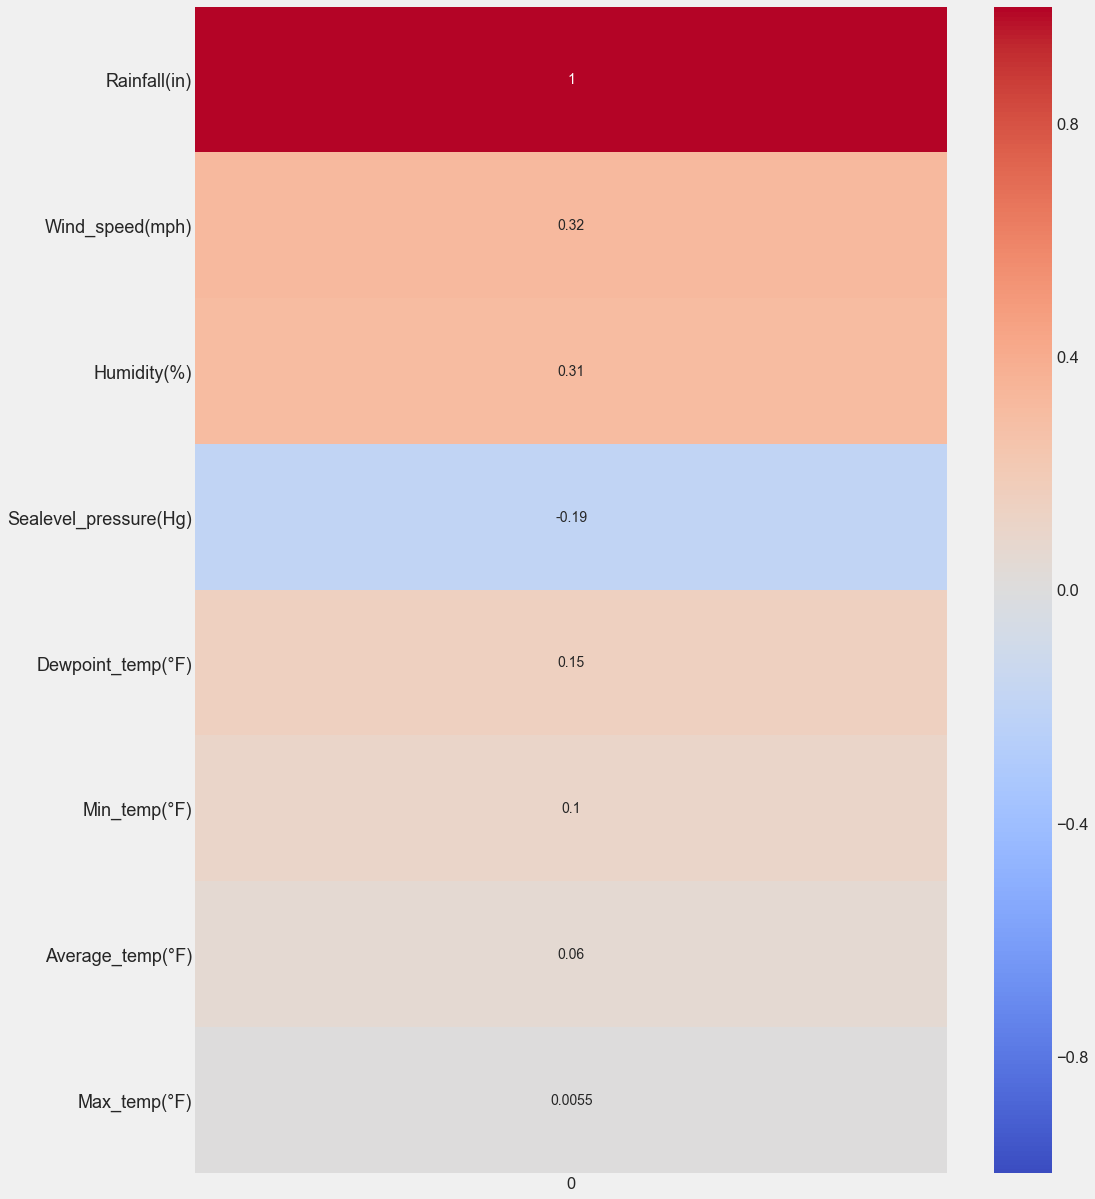

In [35]:
#create correlations chart
correlations = df_rainfall.corrwith(df_rainfall['Rainfall(in)']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]

fig, ax = plt.subplots(figsize=(15,20))
plt.yticks(rotation='40', fontsize=18)
sns.heatmap(sorted_correlations.to_frame(), \
            cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

We can see that features such as humidity and wind speeds have a strong relationship with daily rainfall. While daily sealevel pressure had a negative affect.

In [36]:
df_rainfall['Rain or Not'].value_counts()

0    12548
1     5695
Name: Rain or Not, dtype: int64

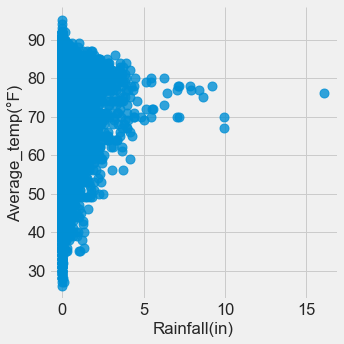

In [37]:
sns.lmplot(y='Average_temp(°F)', x='Rainfall(in)', data= df_rainfall, fit_reg=False);

In [38]:
#Daily Precipitation outliers
df_rainfall.loc[df_rainfall['Rainfall(in)'] > 6]

City   datetime  Dewpoint_temp(°F)  Humidity(%)  \
77698       Houston 2016-04-18          65.000000    96.000000   
94546       Houston 2017-08-26          75.000000    93.000000   
94605       Houston 2017-08-27          74.000000    95.000000   
119870      Houston 2019-09-19          74.000000    91.000000   
51271        Mobile 2014-04-29          66.350515    95.206186   
20784   New_Orleans 2011-09-03          75.000000    85.000000   
33107   New_Orleans 2012-08-29          74.000000    93.000000   
72822   New_Orleans 2015-10-25          70.000000    84.000000   
125301  New_Orleans 2019-10-25          68.000000    90.000000   
18161    Pascagoula 2011-05-26          70.000000    87.000000   
21423    Pascagoula 2011-09-03          74.000000    92.000000   
35282    Pascagoula 2012-08-29          75.000000    89.000000   
44927    Pascagoula 2013-05-01          66.000000    89.000000   
58889    Pascagoula 2014-04-29          67.000000    94.000000   
77324    Pascagoula 2015-09-27          70.000000    90.000000   
33047         Tampa 2012-06-24          74.000000    91.000000   

        Sealevel_pressure(Hg)  Max_temp(°F)  Min_temp(°F)  Average_temp(°F)  \
77698                30.02000          70.0          64.0              67.0   
94546                29.82000          79.0          74.0              77.0   
94605                29.75000          77.0          74.0              76.0   
119870               29.88000          82.0          74.0              78.0   
51271                29.76125          78.0          62.0              70.0   
20784                29.55000          84.0          76.0              80.0   
33107                29.56000          79.0          77.0              78.0   
72822                29.82000          78.0          72.0              75.0   
125301               29.91000          79.0          66.0              73.0   
18161                29.89000          87.0          64.0              76.0   
21423                29.71000          80.0          73.0              77.0   
35282                29.63000          81.0          75.0              78.0   
44927                29.89000          77.0          63.0              70.0   
58889                29.75000          77.0          63.0              70.0   
77324                29.91000          83.0          70.0              77.0   
33047                29.79000          80.0          75.0              78.0   

        Wind_speed(mph)  Rainfall(in)  Rain or Not  
77698              36.0          9.92            1  
94546              47.0          8.37            1  
94605              35.0         16.07            1  
119870             43.0          9.21            1  
51271              40.0          9.94            1  
20784              49.0          6.25            1  
33107              75.0          7.86            1  
72822              46.0          8.67            1  
125301             25.0          6.24            1  
18161              56.0          6.41            1  
21423              39.0          7.93            1  
35282              52.0          7.19            1  
44927              31.0          7.04            1  
58889              35.0          7.19            1  
77324              25.0          7.03            1  
33047              45.0          7.11            1

Doing some research on the days with higher rainfalls, we see that the areas were getting hit by a hurricane or tropical storm. For the time being we'll leave them in or datasets.

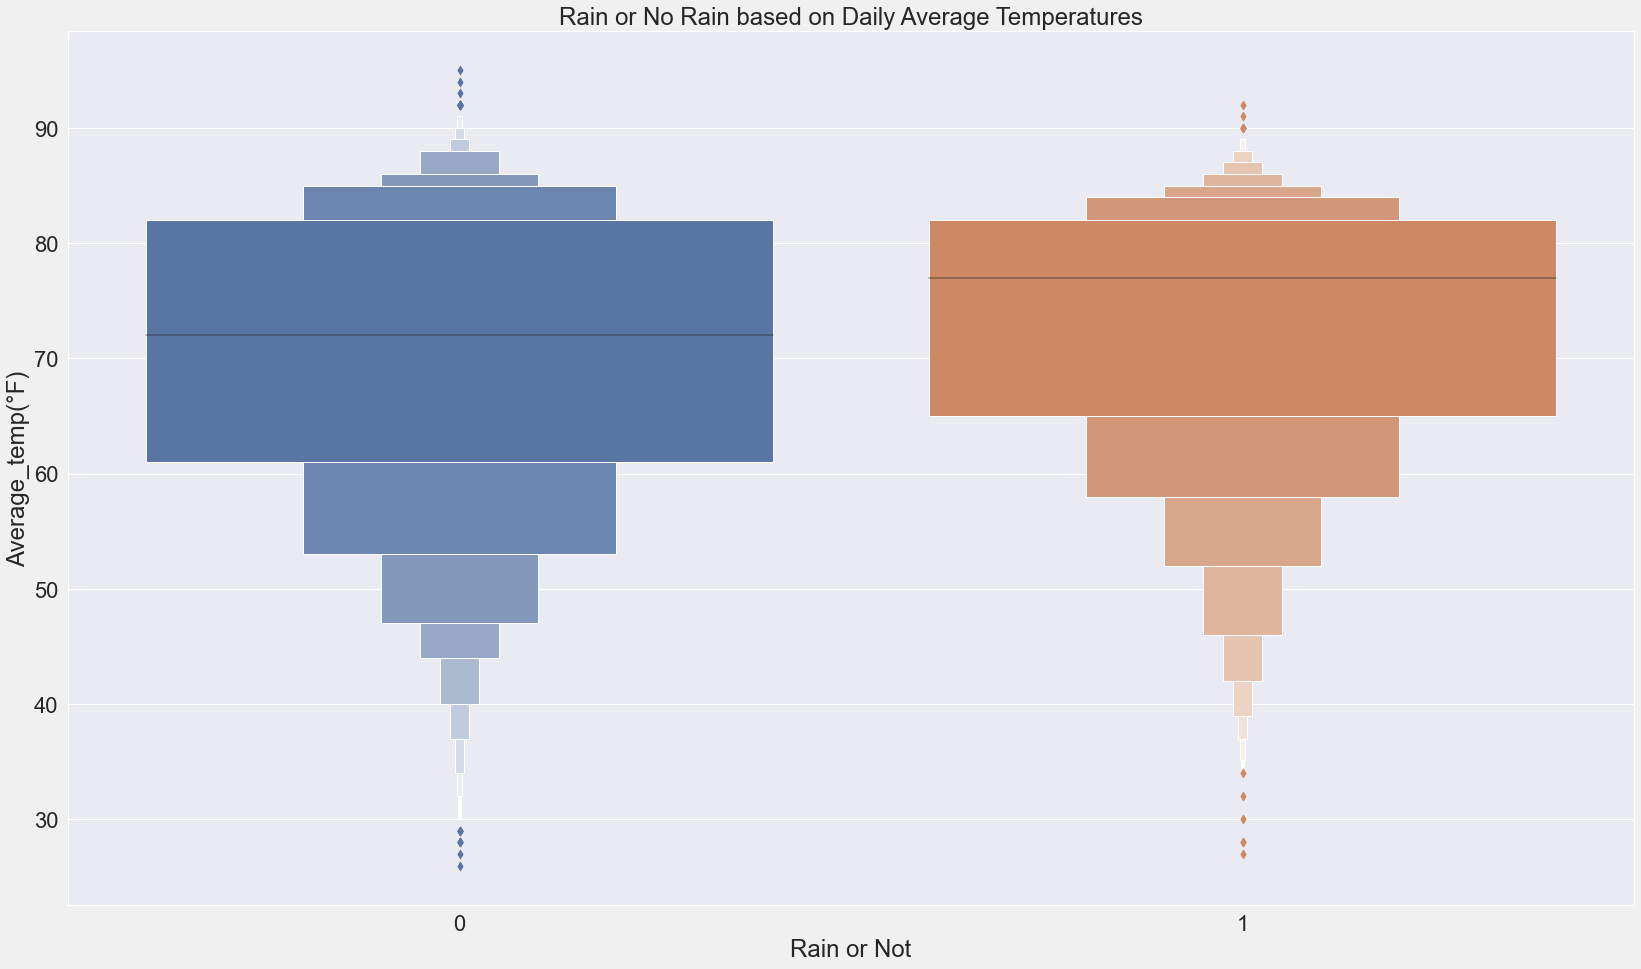

In [39]:
#boxenplot to visualize Rain or No Rain based on Daily Average Temperatures
plt.figure(figsize=(25,15)),
sns.set(font_scale=2)
sns.boxenplot(df_rainfall['Rain or Not'], df_rainfall['Average_temp(°F)']).set_title('Rain or No Rain based on Daily Average Temperatures');

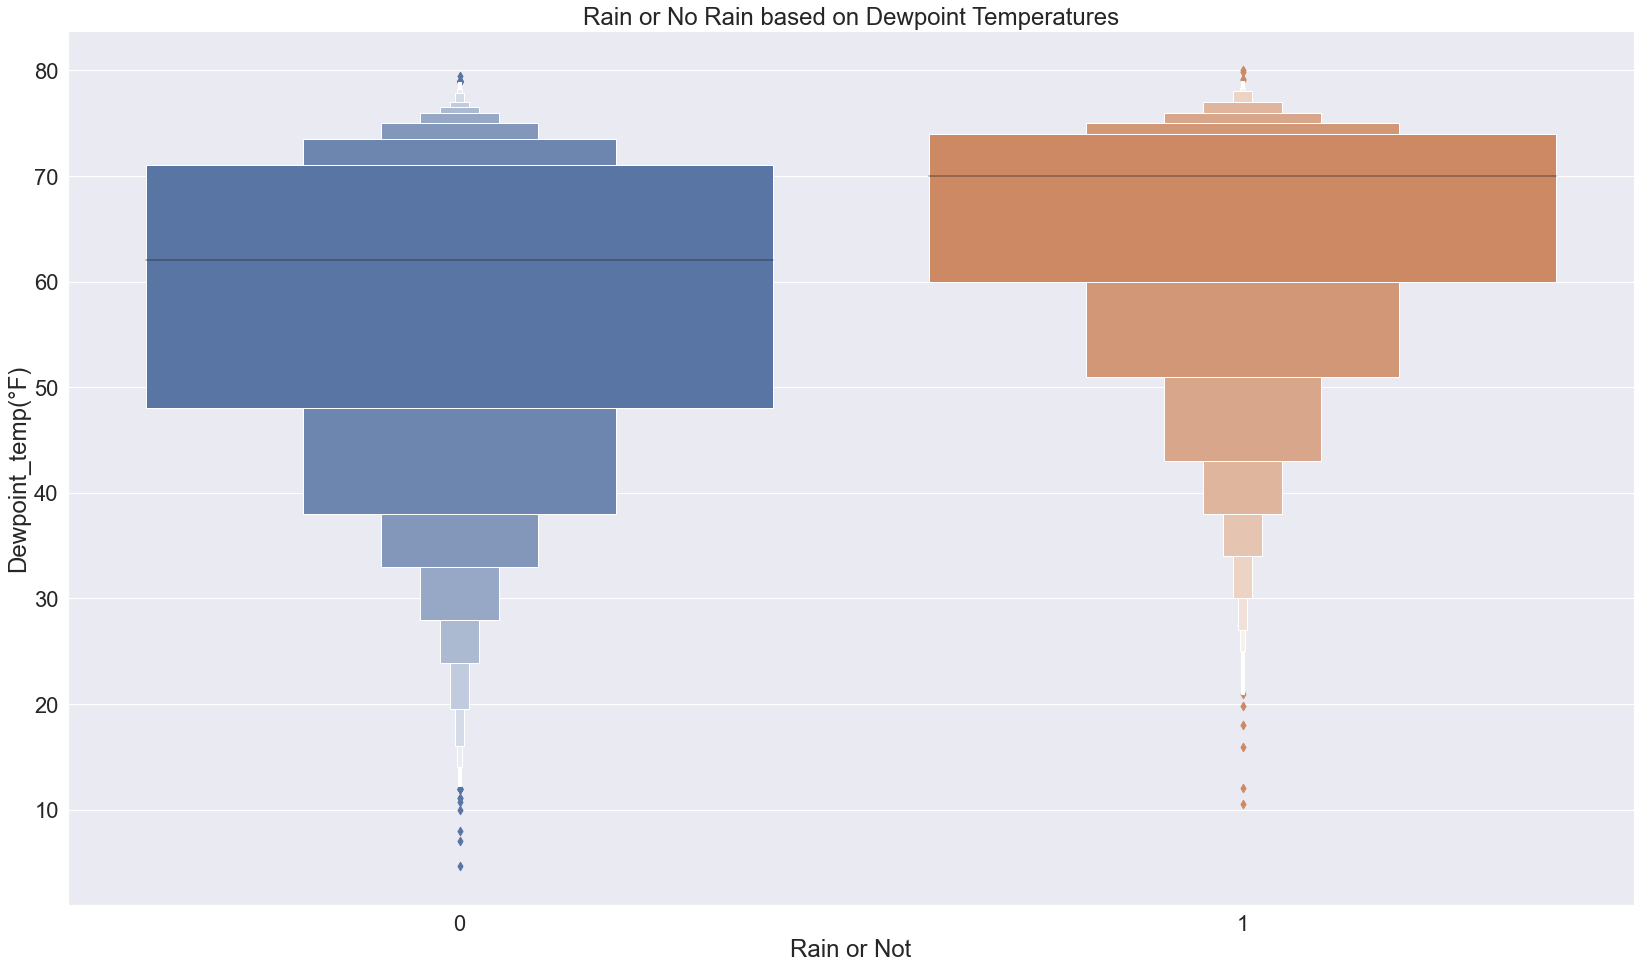

In [40]:
#boxenplot to visualize Rain or No Rain based on Daily Average Dewpoint Temperatures
plt.figure(figsize=(25,15)),
sns.set(font_scale=2)
sns.boxenplot(df_rainfall['Rain or Not'], df['Dewpoint_temp(°F)']).set_title('Rain or No Rain based on Dewpoint Temperatures');

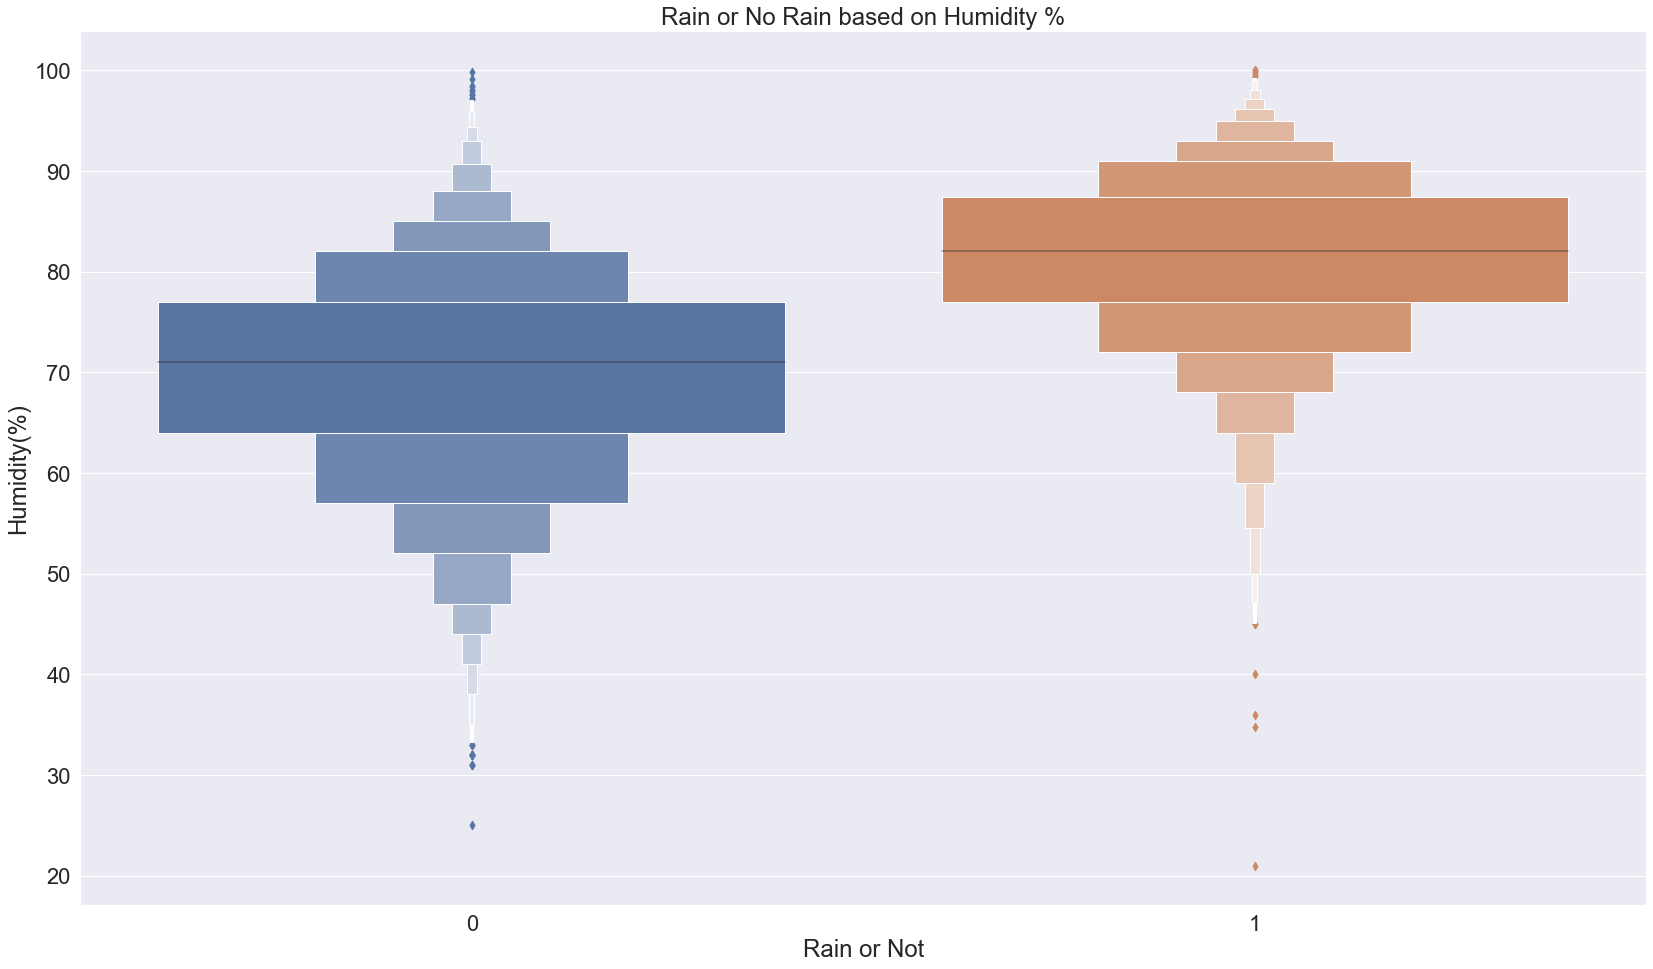

In [41]:
#boxenplot to visualize Rain or No Rain based on Daily Average of Humidity %s
plt.figure(figsize=(25,15)),
sns.set(font_scale=2)
sns.boxenplot(df_rainfall['Rain or Not'], df['Humidity(%)']).set_title('Rain or No Rain based on Humidity %');

Through our boxenplots, overall it doesn't seem like average temperatures had a big affect on rainfall days. We do notice that lower temperature days tended to have non rainy days. *note that the Gulf Coast area is not know to receive snow but we considered daily rainfall to also include any snowfalls if there were any days of snow as well.

We see that there is a slight uptick in rainfall days based on days with higher dewpoint temps.

As we can see, higher humidity days tended to produce more days of rain.

In [42]:
df_rain_monthly = df_time['Rainfall(in)'].groupby(df_time['Month_Name']).mean()
df_rain_monthly.sort_values(ascending=False)

Month_Name
August       0.285458
June         0.223883
July         0.222374
May          0.165742
September    0.158107
April        0.156773
December     0.134072
January      0.126981
February     0.125809
March        0.122523
October      0.112059
November     0.081027
Name: Rainfall(in), dtype: float64

In [43]:
df_temp_rain = df_time.groupby('City').agg({'Average_temp(°F)': 'mean', 'Rainfall(in)': 'mean'})
df_temp_rain

Average_temp(°F)  Rainfall(in)
City                                       
Houston             71.047136      0.139984
Mobile              69.145873      0.166597
New_Orleans         71.346396      0.174412
Pascagoula          68.133461      0.169819
Tampa               75.049055      0.148676

In [44]:
df_rain_yearly = df_time['Rainfall(in)'].groupby(df_time['Year']).mean()
df_rain_yearly

Year
2010    0.133189
2011    0.115662
2012    0.163923
2013    0.161171
2014    0.150368
2015    0.185858
2016    0.162765
2017    0.190214
2018    0.177337
2019    0.158296
Name: Rainfall(in), dtype: float64

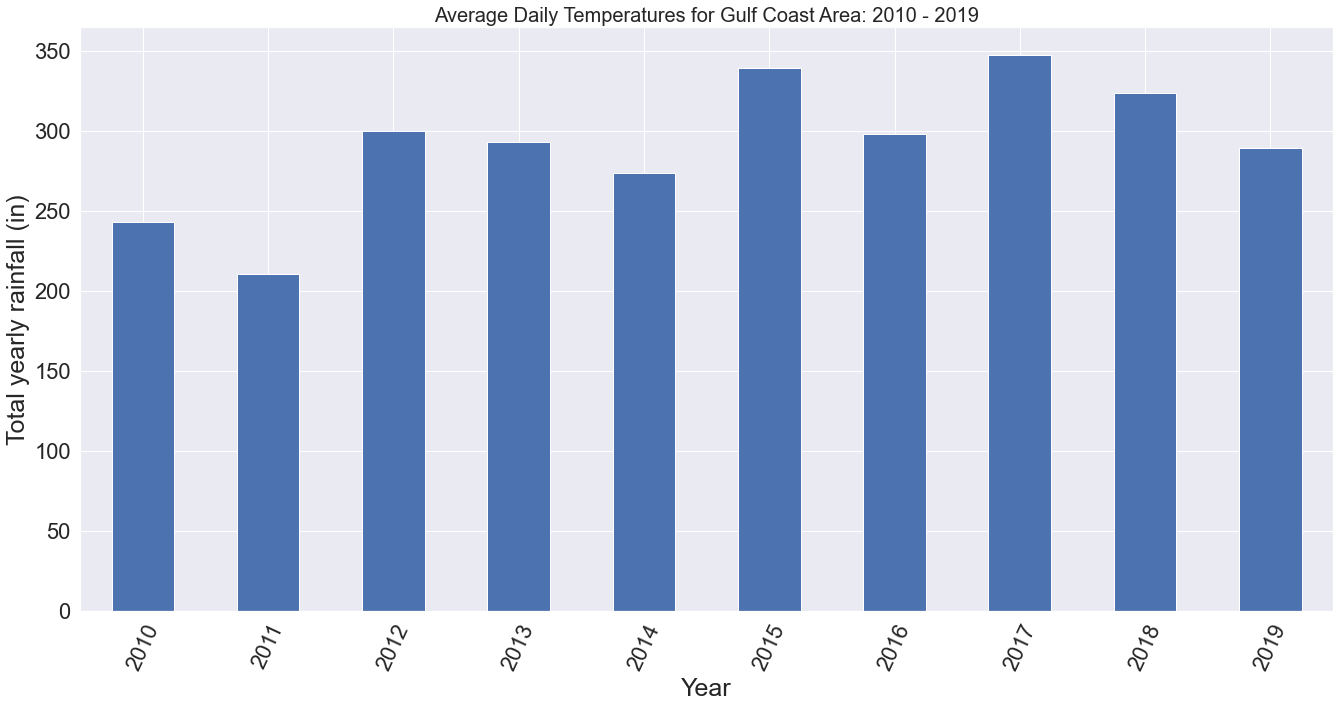

In [45]:
# Yearly rainfall pattern
df_time.groupby(
    ["Year"]
)['Rainfall(in)'].sum().plot(kind="bar", figsize=(20, 10))
plt.title('Average Daily Temperatures for Gulf Coast Area: 2010 - 2019', fontsize=20)
plt.xlabel('Year', fontsize= 25)
plt.ylabel('Total yearly rainfall (in)', fontsize= 25)
plt.xticks(rotation=65)
plt.show()

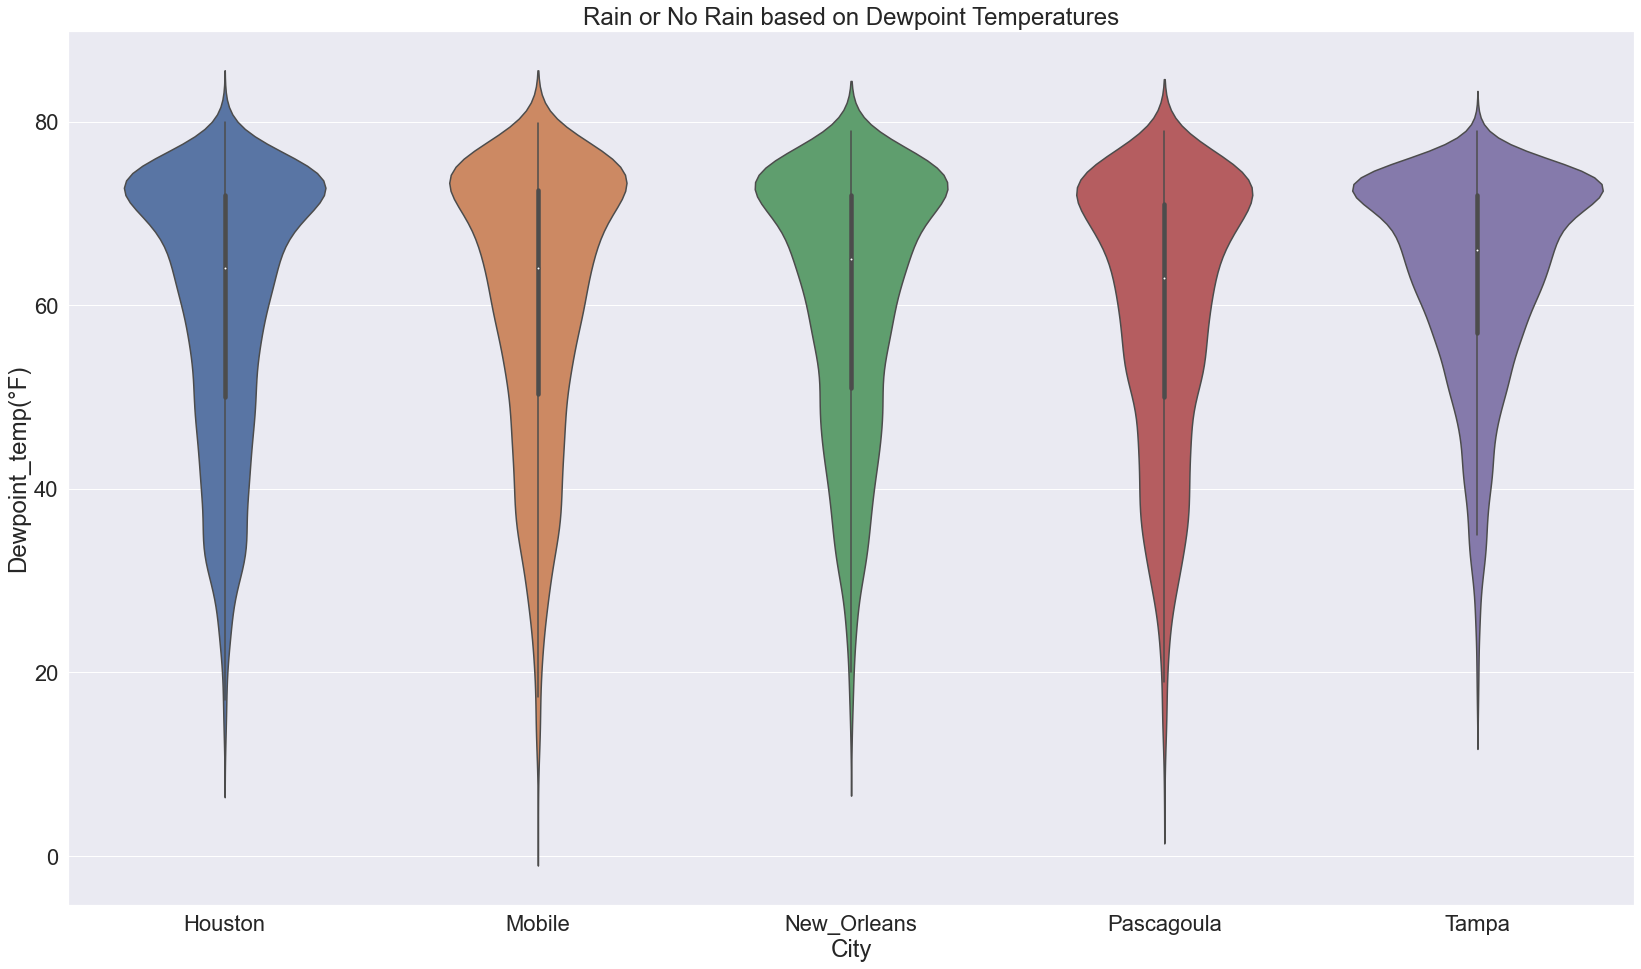

In [46]:
#violinplot to visualize Rain or No Rain based on Daily Average Dewpoint Temperatures
plt.figure(figsize=(25,15)),
sns.set(font_scale=2)
sns.violinplot(df['City'], df['Dewpoint_temp(°F)']).set_title('Rain or No Rain based on Dewpoint Temperatures');

The violinplot plots a distribution on both sides of the quantitative axes and is seen to be a favorable alternative to the boxplot.

In [47]:
fig = px.scatter(
    df_time,
    x= 'Year',
    y= 'Rainfall(in)',
    size= 'Rainfall(in)',
    color= 'Rainfall(in)',
    hover_name= 'City',
    size_max=34,
    color_continuous_scale=px.colors.sequential.PuBu
)
fig.update_layout(
    title=go.layout.Title(
        text= 'Heaviest daily rainfall for Gulf Coast Area; 2010 - 2019'
    )
)
fig['layout']['yaxis']['autorange'] = "reversed"
fig.show()

As mentioned earlier when we looked at our outliers, the big rainfalls seemed to be associated with a hurricane or tropical storm/depression hitting the area.

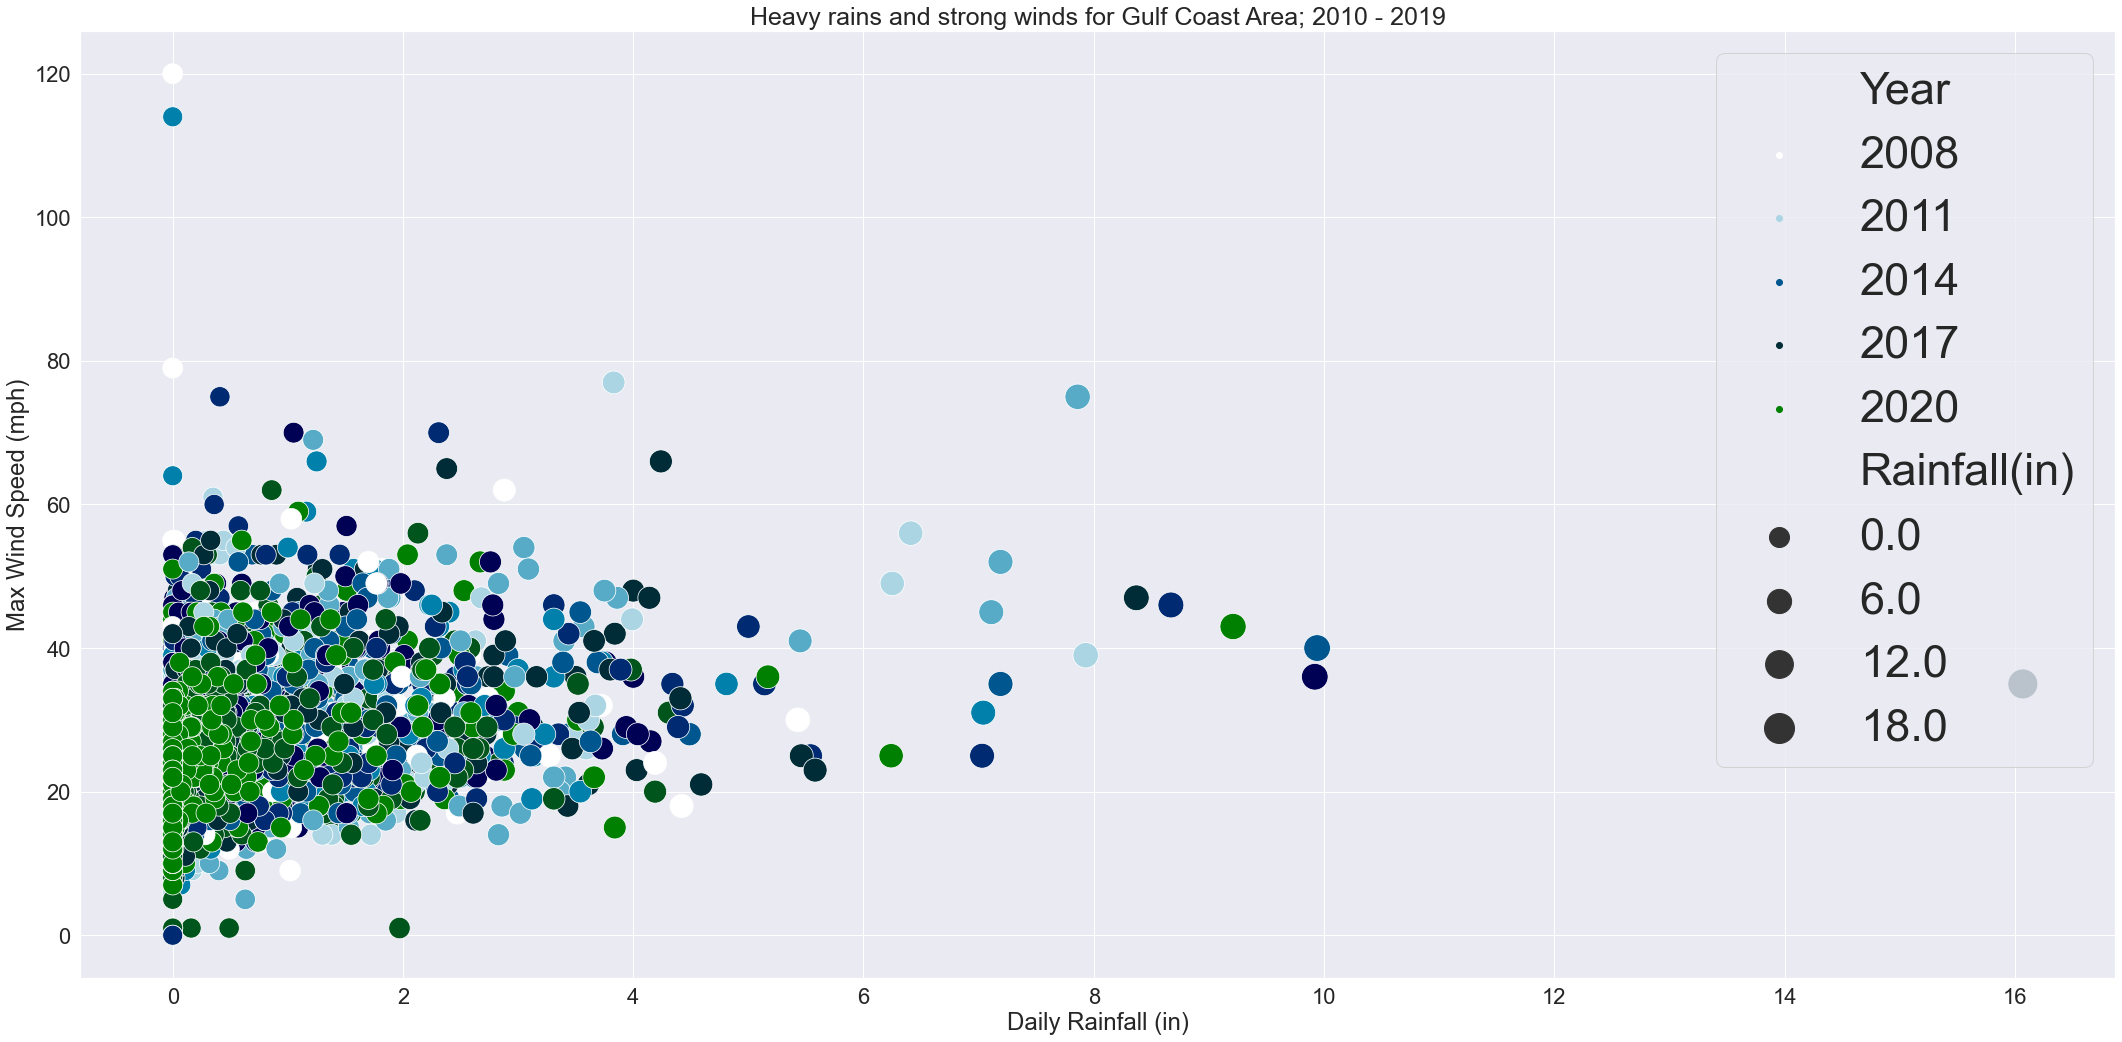

In [48]:
#We naturally associate strong winds with heavy rain as well. Let's see how the two conditions vary over the years: The bigger triangles indicate a higher amount of rain, and those with a darker shade are more recent whereas triangles with a lighter shade reflect earlier records.

plt.figure(figsize=(30, 15))
sns.set(font_scale=2)
sns.scatterplot(
    x='Rainfall(in)',
    y= 'Wind_speed(mph)',
    data= df_time,
    marker="o",
    sizes=(400, 900),
    size= 'Rainfall(in)',
    hue= 'Year',
    palette= 'ocean_r',
)
plt.title('Heavy rains and strong winds for Gulf Coast Area; 2010 - 2019', fontsize=25)
plt.ylabel('Max Wind Speed (mph)')
plt.xlabel('Daily Rainfall (in)')
plt.legend(prop={'size': 45})
plt.tight_layout()
plt.show()

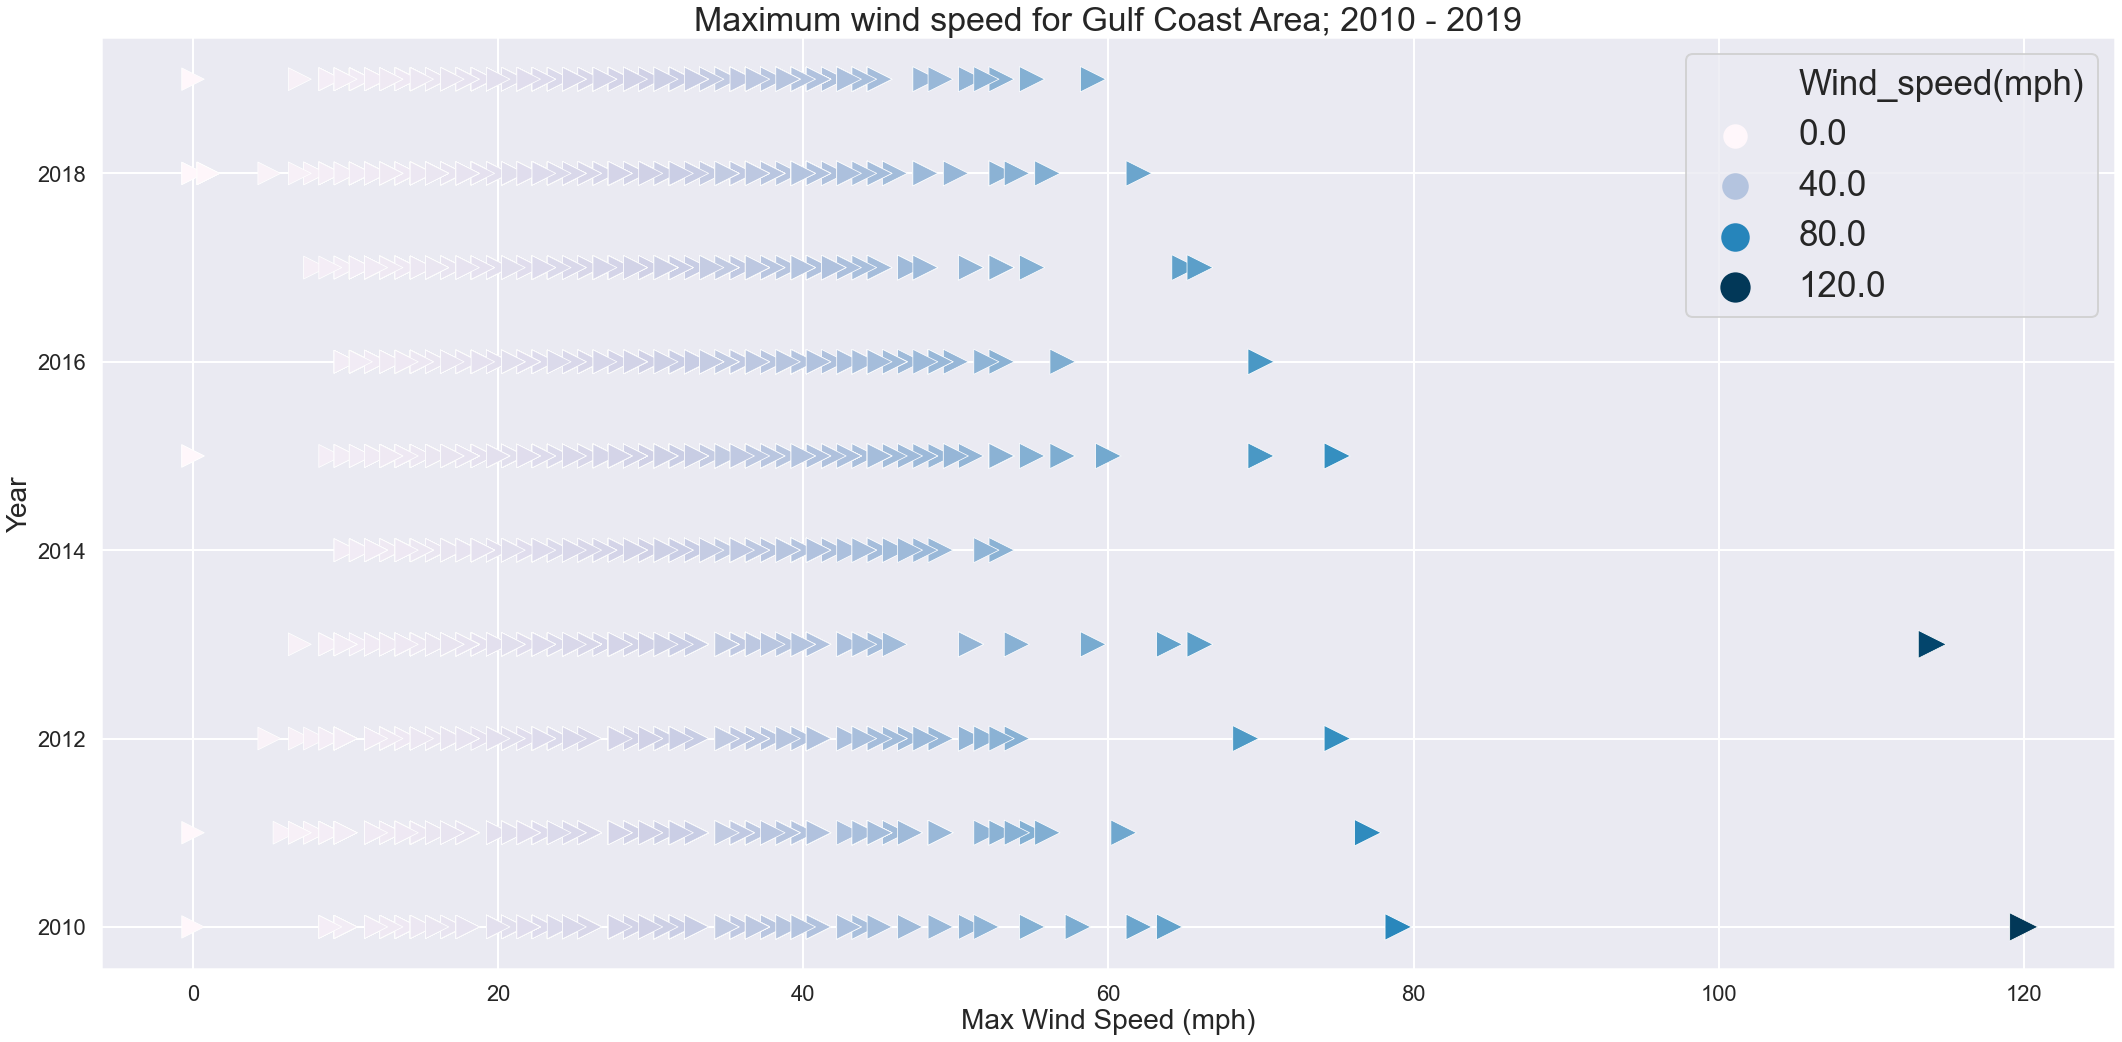

In [49]:
plt.figure(figsize=(30, 15))
#sns.set(font_scale=3)
sns.set_context('poster')
sns.scatterplot(
    x= 'Wind_speed(mph)',
    y= 'Year',
    data= df_time,
    marker= '>',
    sizes=(505, 800),
    size= 'Wind_speed(mph)',
    hue= 'Wind_speed(mph)',
    palette= 'PuBu'
    )

plt.title('Maximum wind speed for Gulf Coast Area; 2010 - 2019', fontsize= 34)
plt.ylabel('Year', fontsize=28)
plt.xlabel('Max Wind Speed (mph)', fontsize= 28)
plt.legend(prop={'size': 35})
plt.tight_layout()
plt.show()

### Exploring any relationships with a target of Temperatures

Our data also provides us an insight for finding any temperature related patterns. We'll use our Max, Min and Average temp variables.

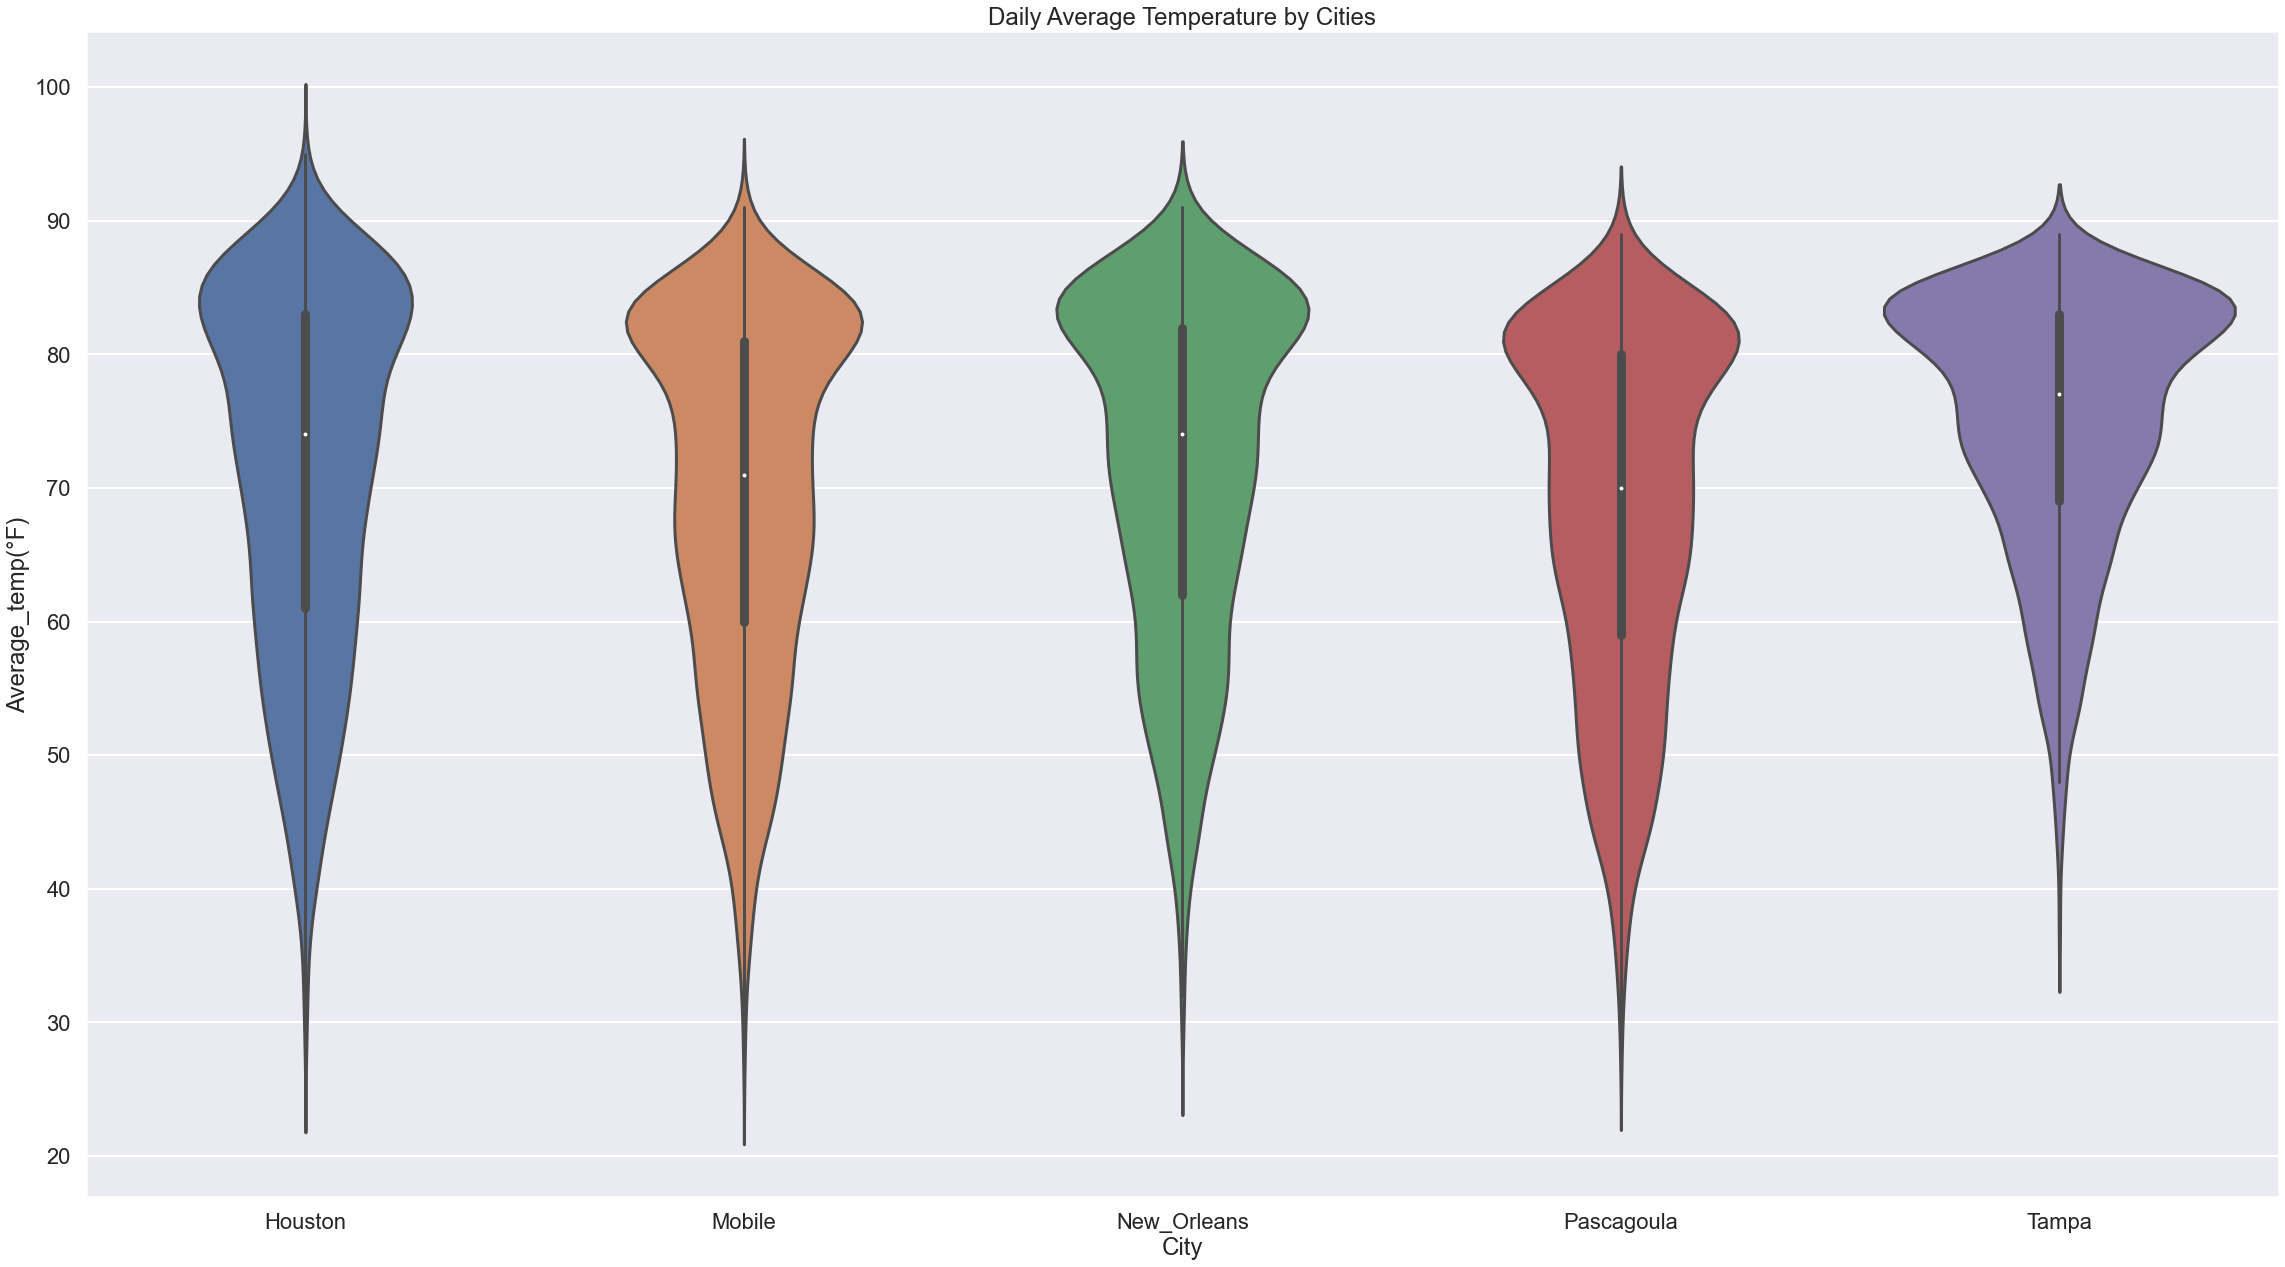

In [50]:
#violinplot to visualize Average Temps per each city
plt.figure(figsize=(35,20)) # adjust the fig size to see everything
sns.violinplot(df['City'], df['Average_temp(°F)']).set_title('Daily Average Temperature by Cities');

Houston has more averaged higher temperatures and it looks to have more combined upper to mid 80 degree temperatures while also have the fewest lower temperatures amongst our cities.

We'll take a look at our general Max, Min and Average temperatures.

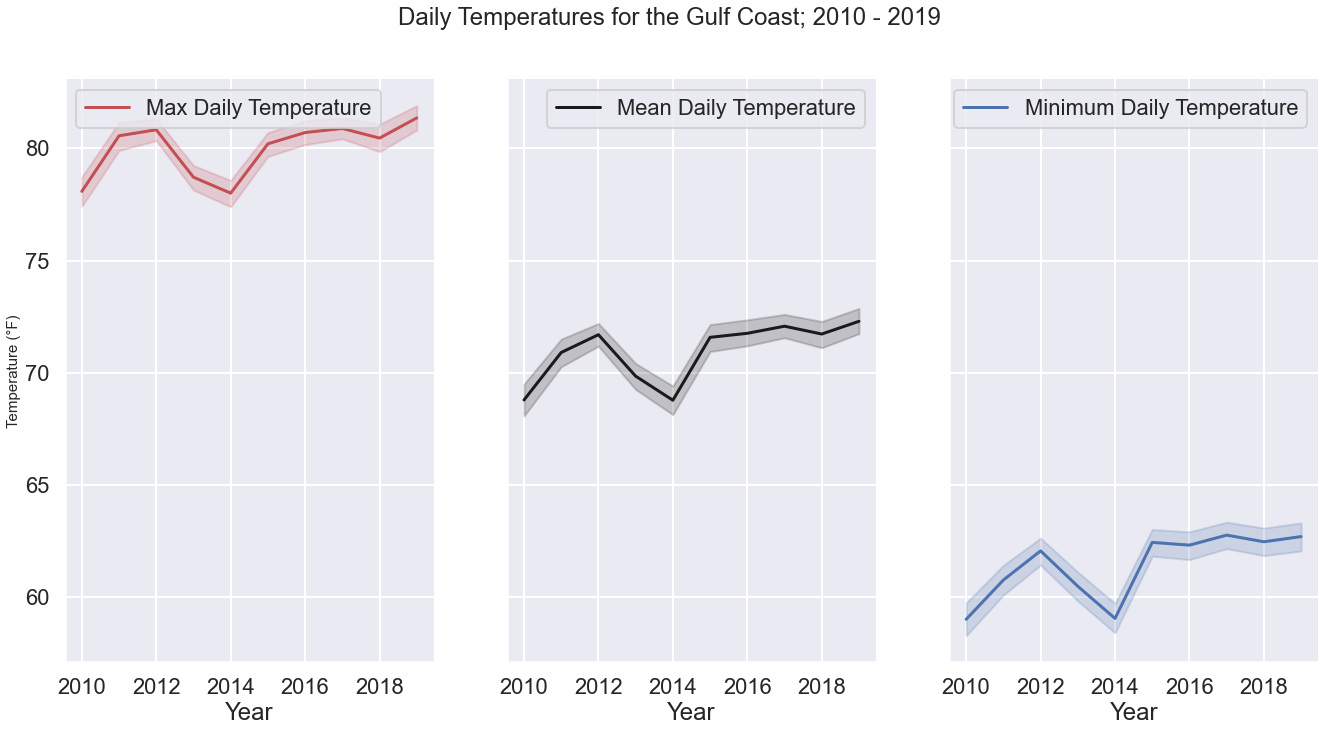

In [51]:
fig, axs = plt.subplots(1, 3, figsize=(20, 10), sharey=True)
sns.lineplot(
    x='Year',
    y='Max_temp(°F)',
    linewidth=3,
    data= df_time,
    label='Max Daily Temperature',
    color='r',
    ax=axs[0],
)
sns.lineplot(
    x= 'Year',
    y= 'Average_temp(°F)',
    linewidth=3,
    data= df_time,
    label= 'Mean Daily Temperature',
    color= 'k',
    ax=axs[1],
)
sns.lineplot(
    x= 'Year',
    y= 'Min_temp(°F)',
    linewidth=3,
    data= df_time,
    label= 'Minimum Daily Temperature',
    color= 'b',
    ax=axs[2],
)
fig.suptitle('Daily Temperatures for the Gulf Coast; 2010 - 2019', fontsize=24)
axs[0].set_ylabel('Temperature (°F)', fontsize=15)
sns.despine()
plt.show()

We can see that temperatures are rising each year. Max Daily Temps averaged under 80 degrees in 2010 but by 2019 they averaged above 80 degrees. Low Daily Temps averaged below 60 degrees in 2010 and averaged around 63 degrees by 2019.

We can look at boxplots of our temperature variables over the months to get more of a visual perspective.

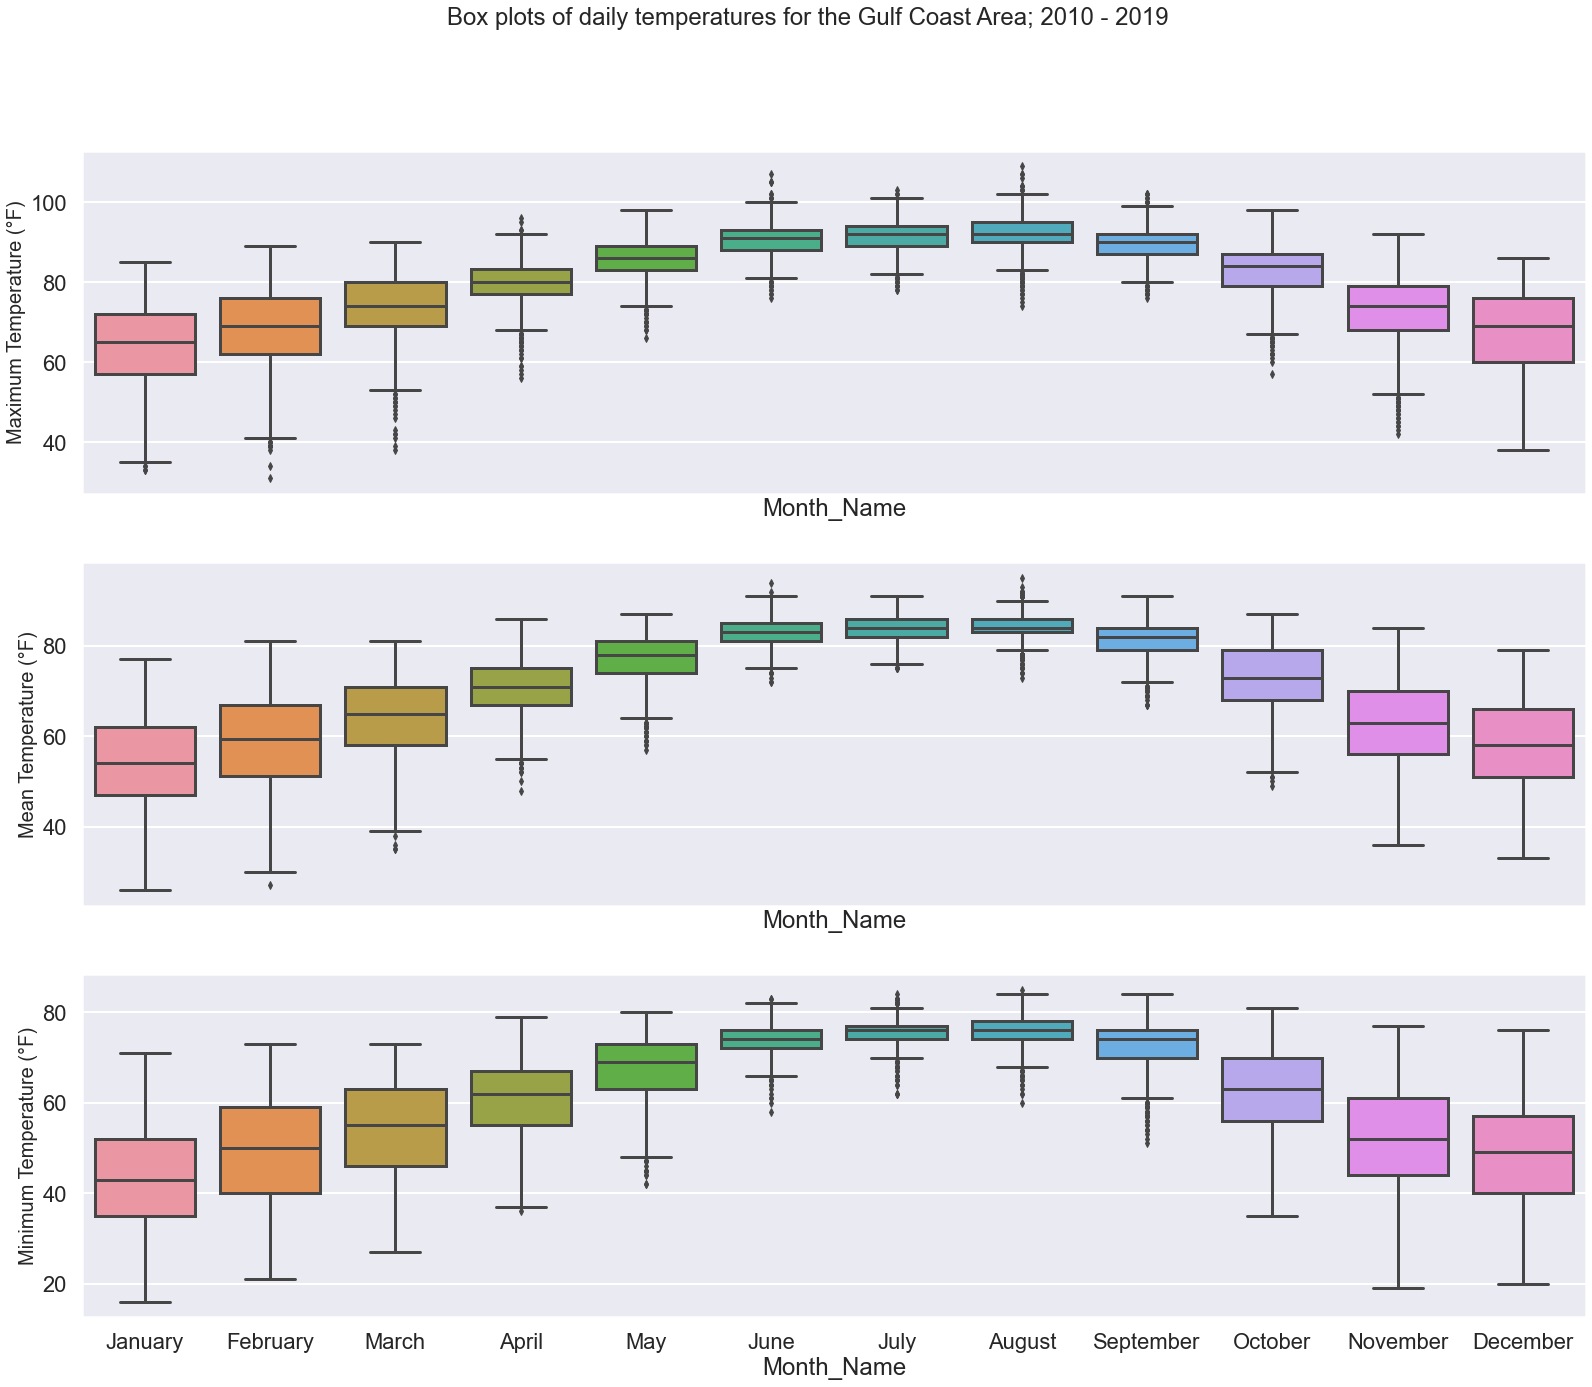

In [52]:
fig, axs = plt.subplots(3, 1, figsize=(24, 20), sharex=True)
sns.boxplot(y='Max_temp(°F)', x="Month_Name", data= df_time, ax=axs[0])
sns.boxplot(y='Average_temp(°F)', x="Month_Name", data= df_time, ax=axs[1])
sns.boxplot(y='Min_temp(°F)', x="Month_Name", data= df_time, ax=axs[2])
fig.suptitle(
    'Box plots of daily temperatures for the Gulf Coast Area; 2010 - 2019', fontsize=24
)
axs[0].set_ylabel('Maximum Temperature (°F)', fontsize= 20)
axs[1].set_ylabel('Mean Temperature (°F)', fontsize= 20)
axs[2].set_ylabel('Minimum Temperature (°F)', fontsize= 20)
plt.show()

In [53]:
df_temp_max_monthly = df_time['Max_temp(°F)'].groupby(df_time['Month_Name']).mean()
print('Max_temp(°F): \n', df_temp_max_monthly.sort_values(ascending=False))

Max_temp(°F): 
 Month_Name
August       92.240645
July         91.758710
June         90.691795
September    89.722000
May          85.941935
October      82.842479
April        79.803333
March        73.603871
November     73.004667
February     68.138298
December     67.574593
January      63.689032
Name: Max_temp(°F), dtype: float64


In [54]:
df_temp_min_monthly = df_time['Min_temp(°F)'].groupby(df_time['Month_Name']).mean()
print('Min_temp(°F): \n', df_temp_min_monthly.sort_values(ascending=False))

Min_temp(°F): 
 Month_Name
August       75.769677
July         75.565806
June         74.004670
September    72.431333
May          67.381935
October      62.406714
April        60.716667
March        53.945161
November     52.026667
February     49.354610
December     48.881433
January      43.637419
Name: Min_temp(°F), dtype: float64


In [55]:
df_temp_max_yearly = df_time['Max_temp(°F)'].groupby(df_time['Year']).mean()
print('Max_temp(°F): \n', df_temp_max_yearly)

Max_temp(°F): 
 Year
2010    78.081644
2011    80.559648
2012    80.828415
2013    78.713029
2014    78.003297
2015    80.202192
2016    80.704372
2017    80.885479
2018    80.456438
2019    81.356164
Name: Max_temp(°F), dtype: float64


In [56]:
df_temp_min_yearly = df_time['Min_temp(°F)'].groupby(df_time['Year']).mean()
print('Min_temp(°F): \n', df_temp_min_yearly)

Min_temp(°F): 
 Year
2010    59.010959
2011    60.762507
2012    62.061749
2013    60.483233
2014    59.051099
2015    62.439452
2016    62.317486
2017    62.763288
2018    62.467397
2019    62.698630
Name: Min_temp(°F), dtype: float64


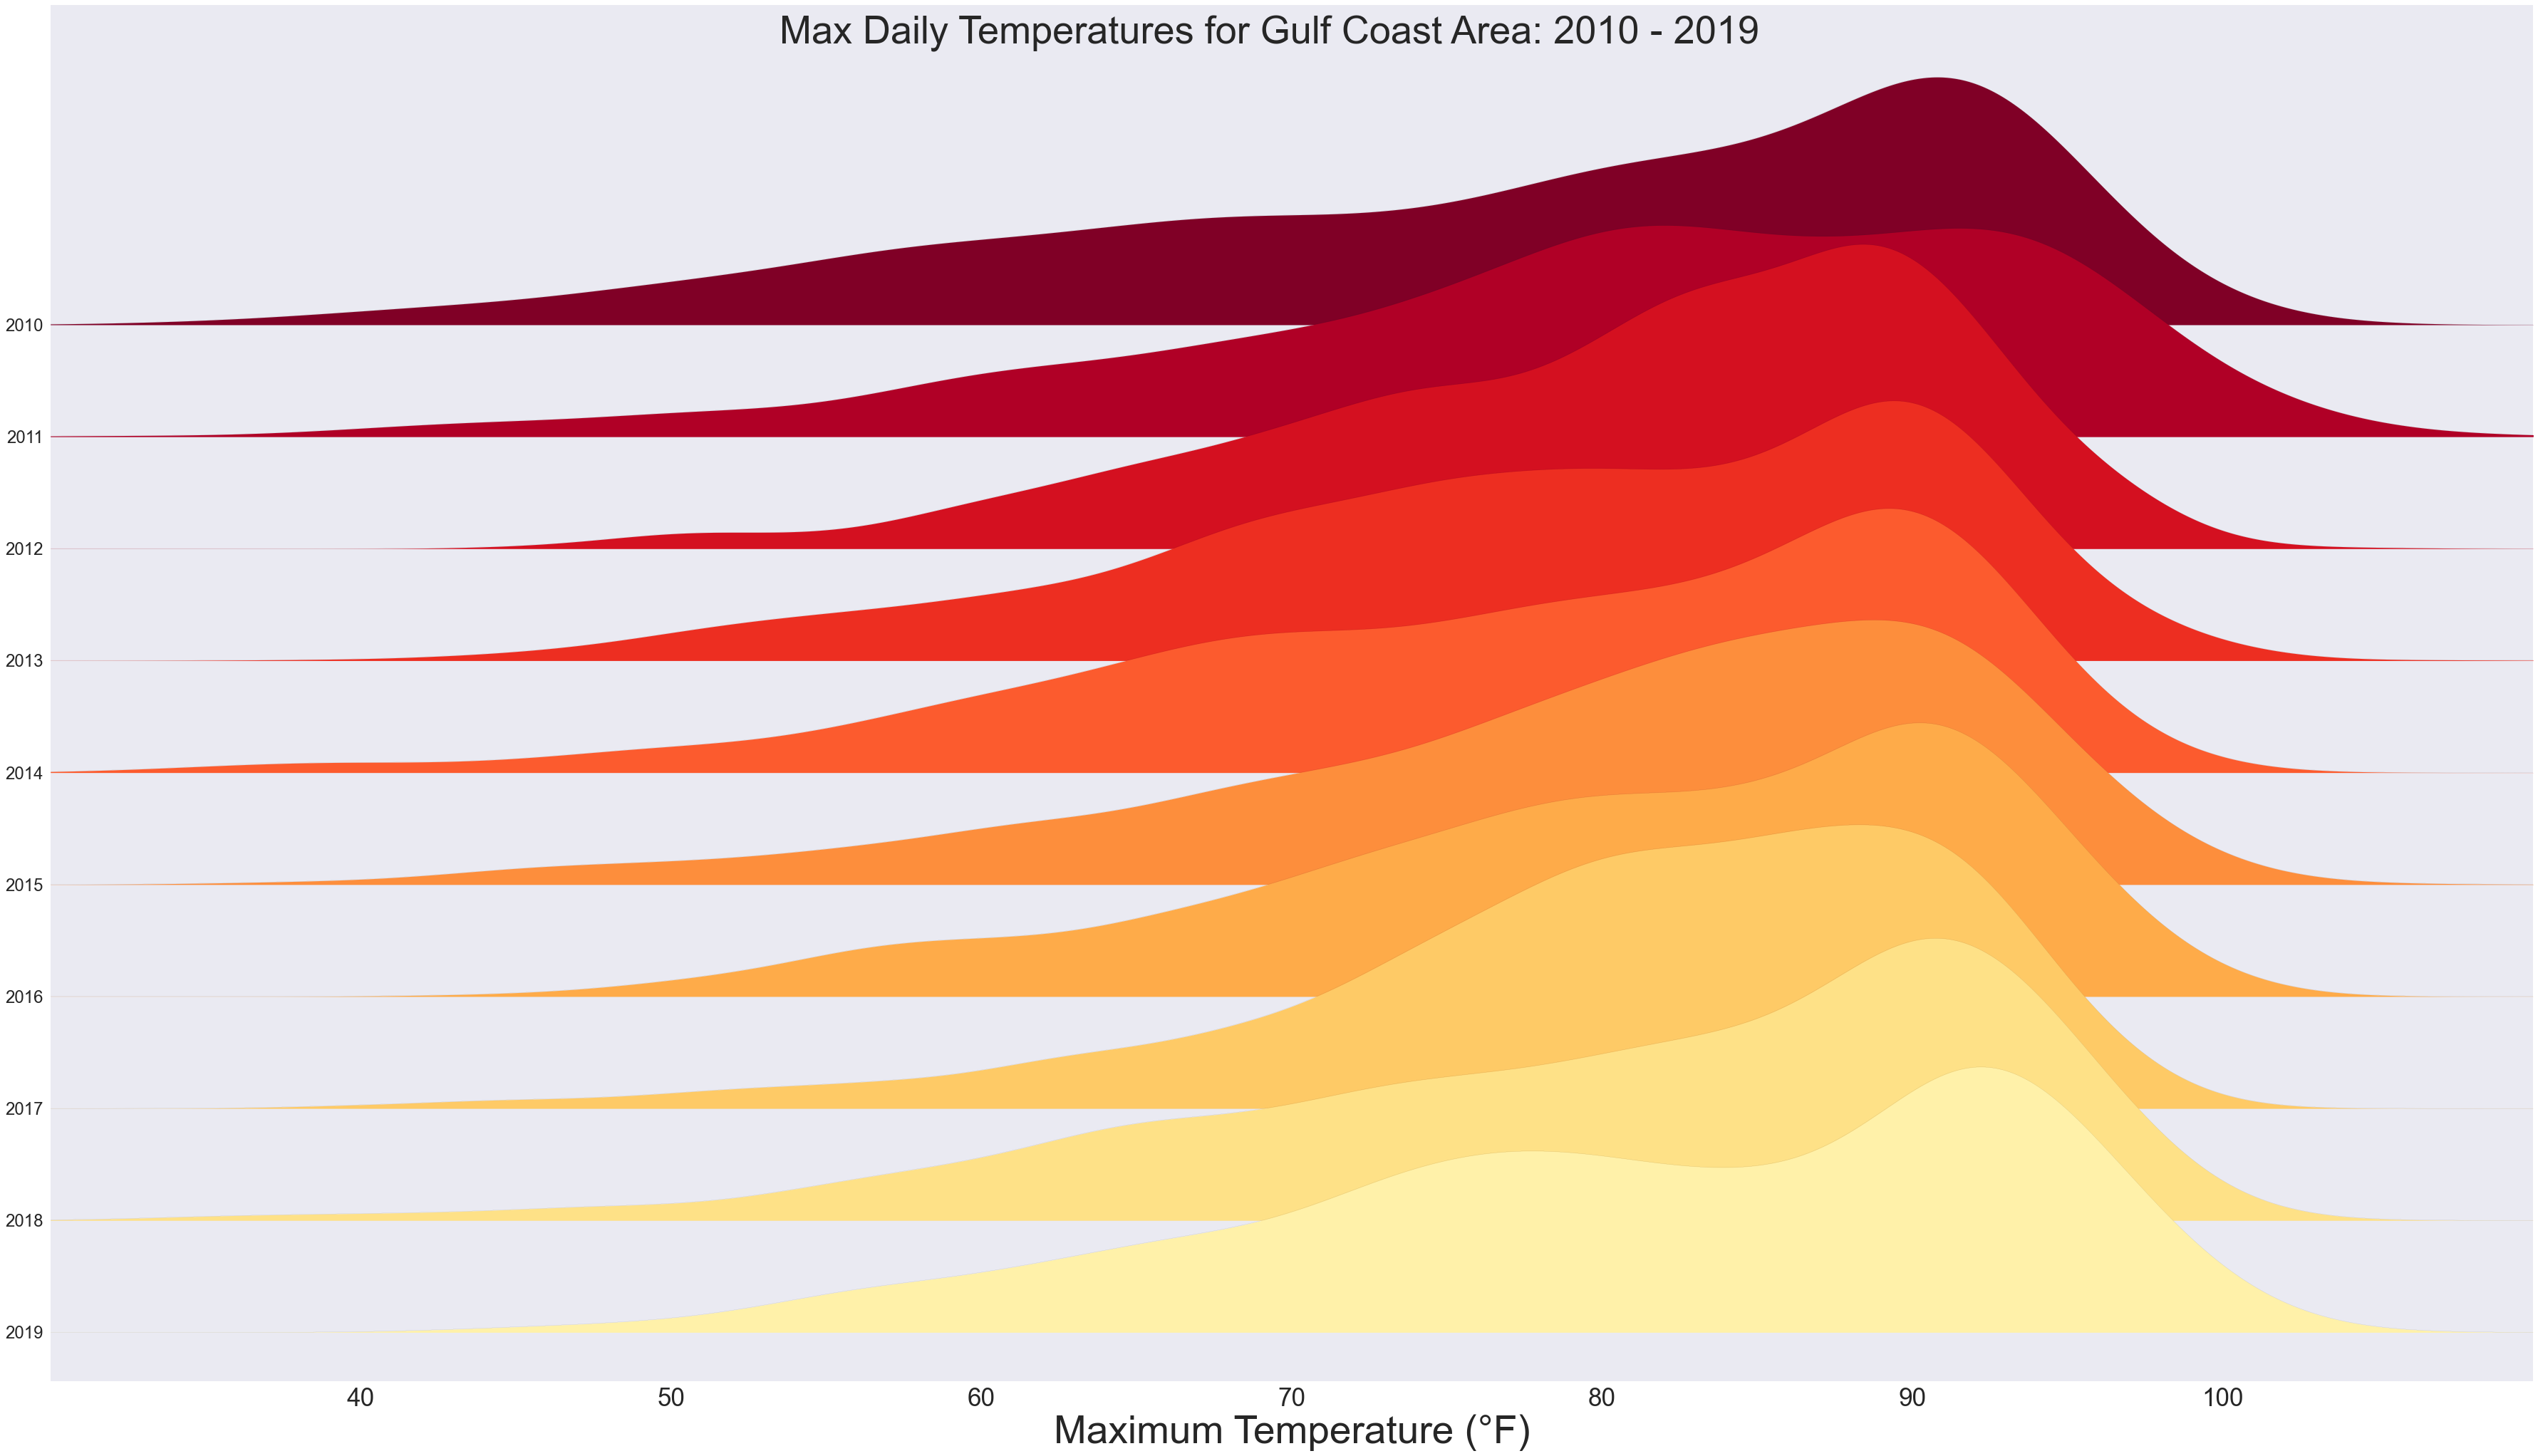

In [57]:
sns.set(font_scale= 2)
fig, axes = joypy.joyplot(df_time, by="Year", column="Max_temp(°F)", figsize=(50,28),
             linewidth=0.05,overlap=3,colormap=cm.YlOrRd_r, x_range=[30,110])
fig.suptitle('Max Daily Temperatures for Gulf Coast Area: 2010 - 2019', fontsize= 54)
plt.xlabel('Maximum Temperature (°F)', fontsize= 55)
plt.ylabel('Year')
plt.xticks(fontsize= 35)
plt.yticks(fontsize= 25)
plt.show()

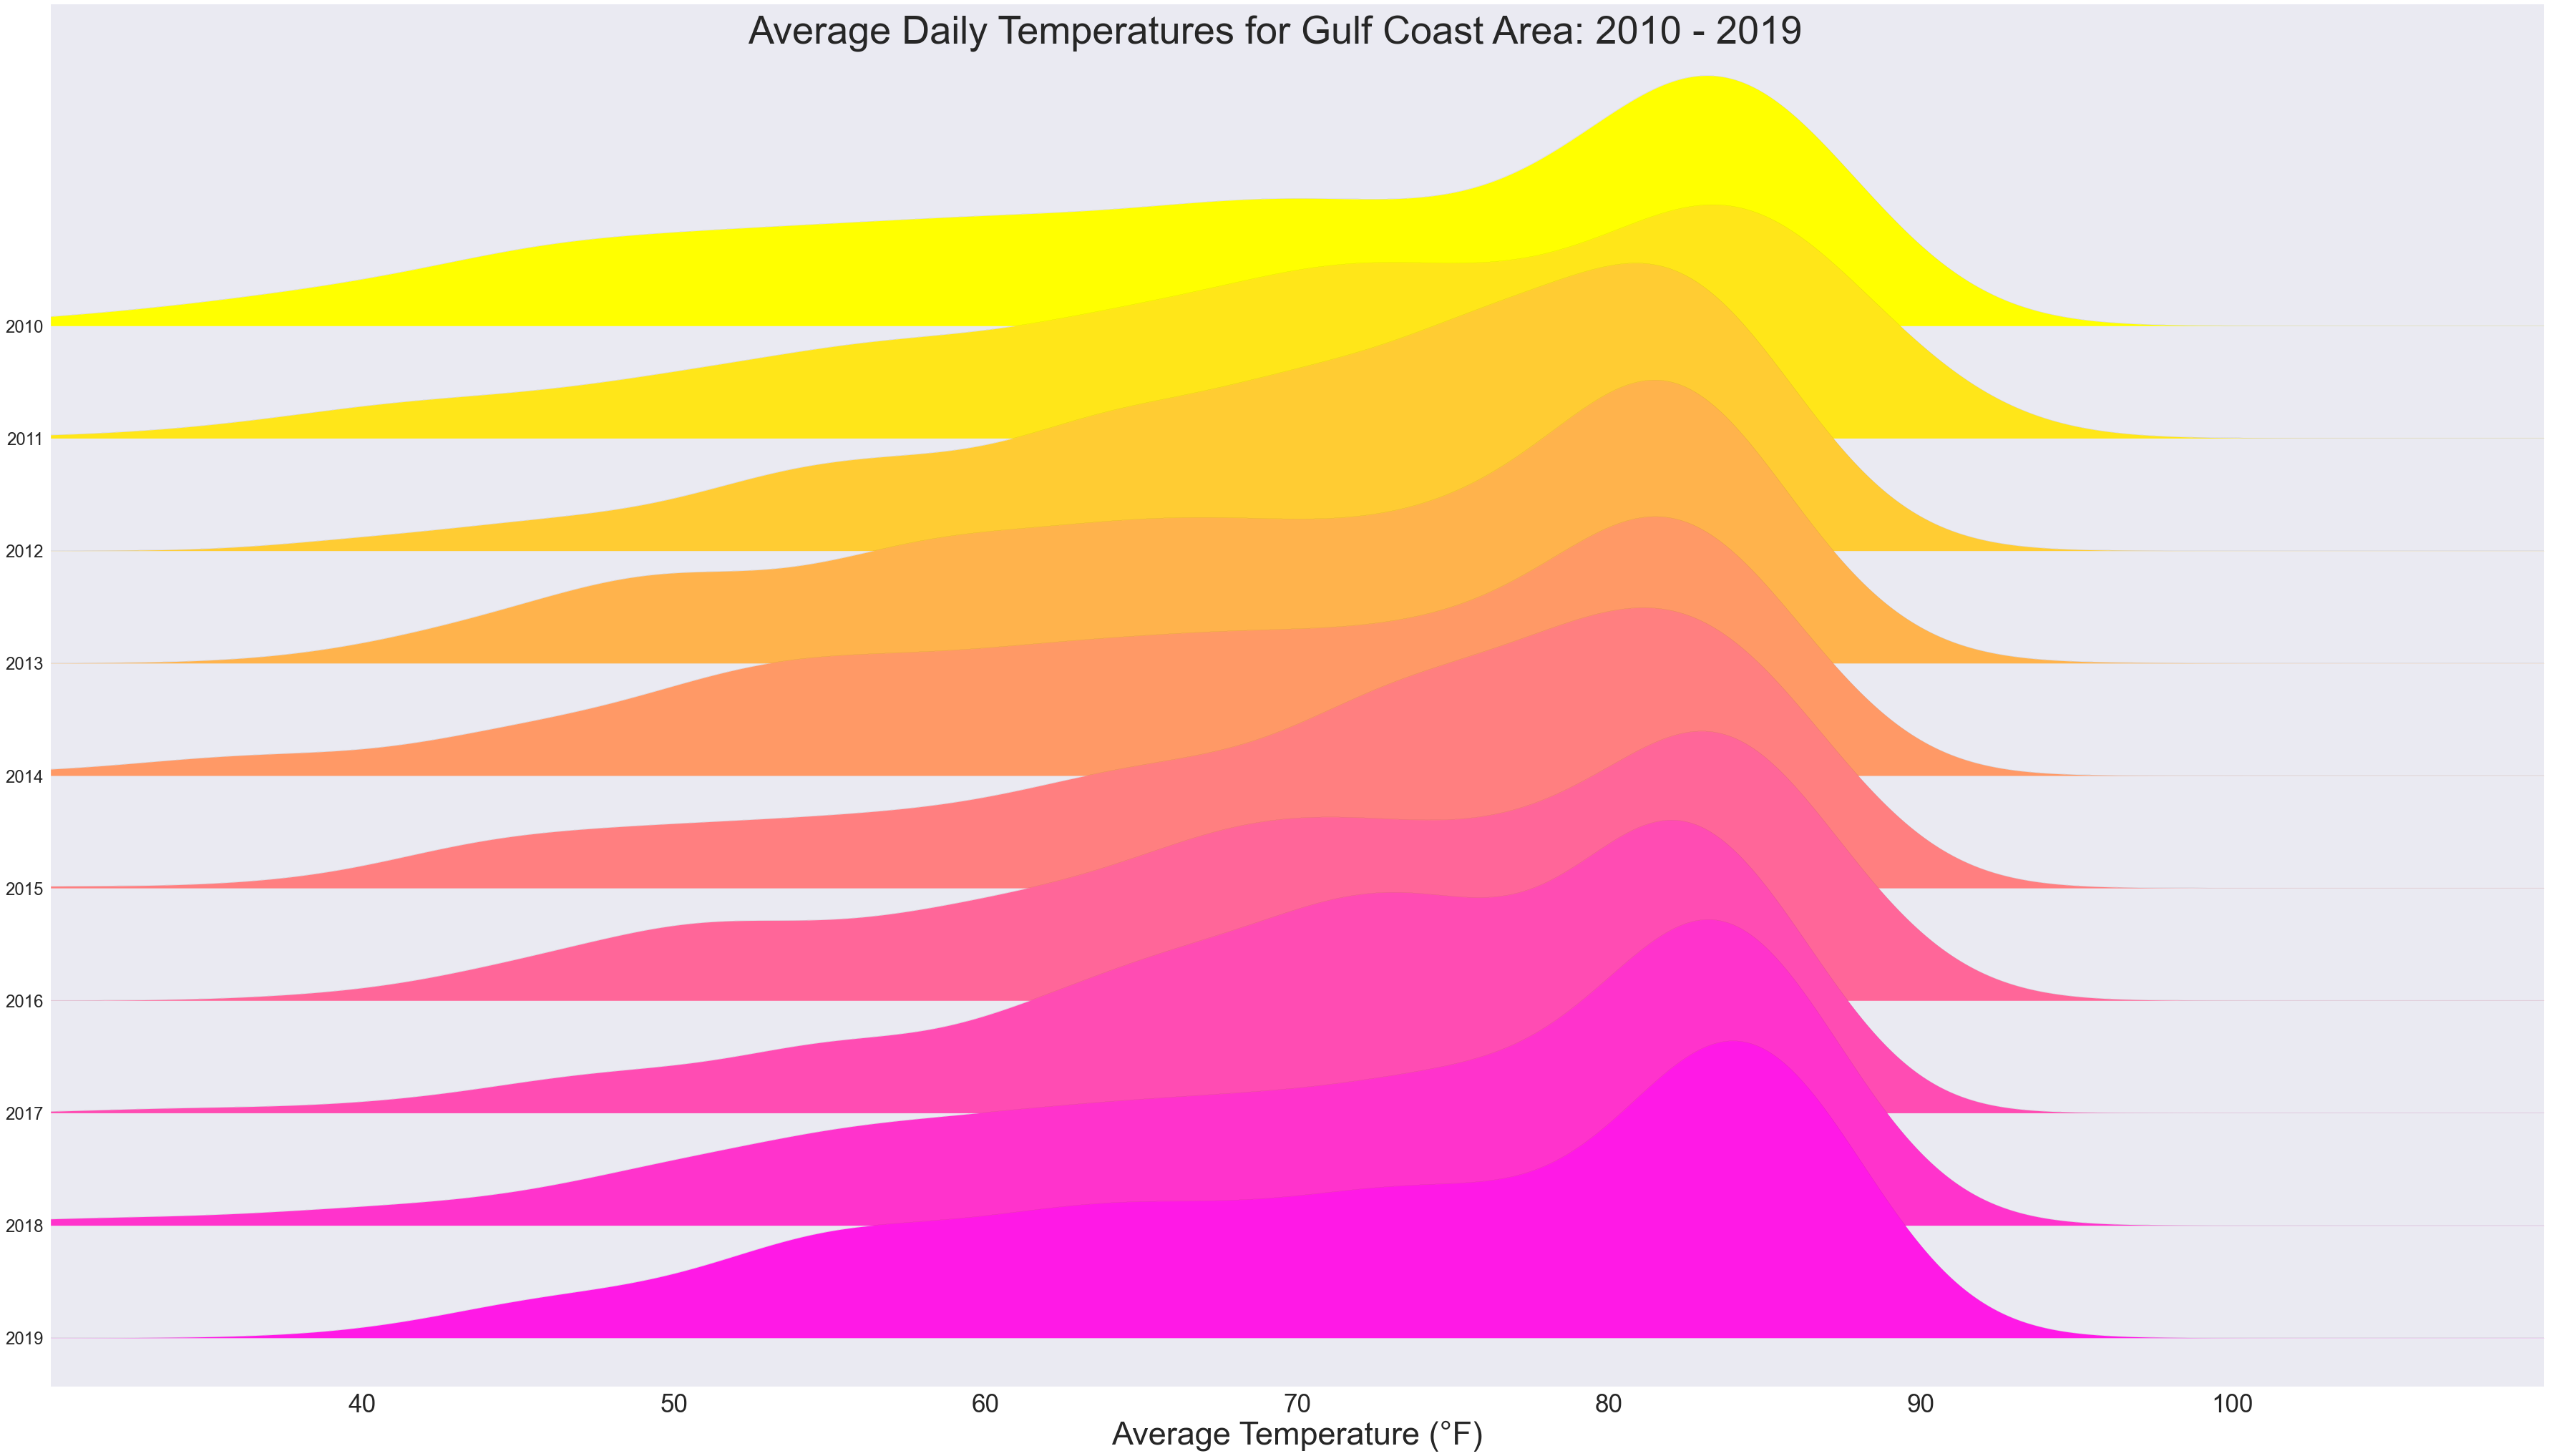

In [58]:
sns.set(font_scale= 2)
fig, axes = joypy.joyplot(df_time, by="Year", column="Average_temp(°F)", figsize=(50,28),
             linewidth=0.05,overlap=3,colormap=cm.spring_r, x_range=[30,110])
fig.suptitle('Average Daily Temperatures for Gulf Coast Area: 2010 - 2019', fontsize= 54)
plt.xlabel('Average Temperature (°F)', fontsize= 45)
plt.xticks(fontsize= 35)
plt.yticks(fontsize= 25)
plt.ylabel('Year', fontsize= 45)
plt.show()

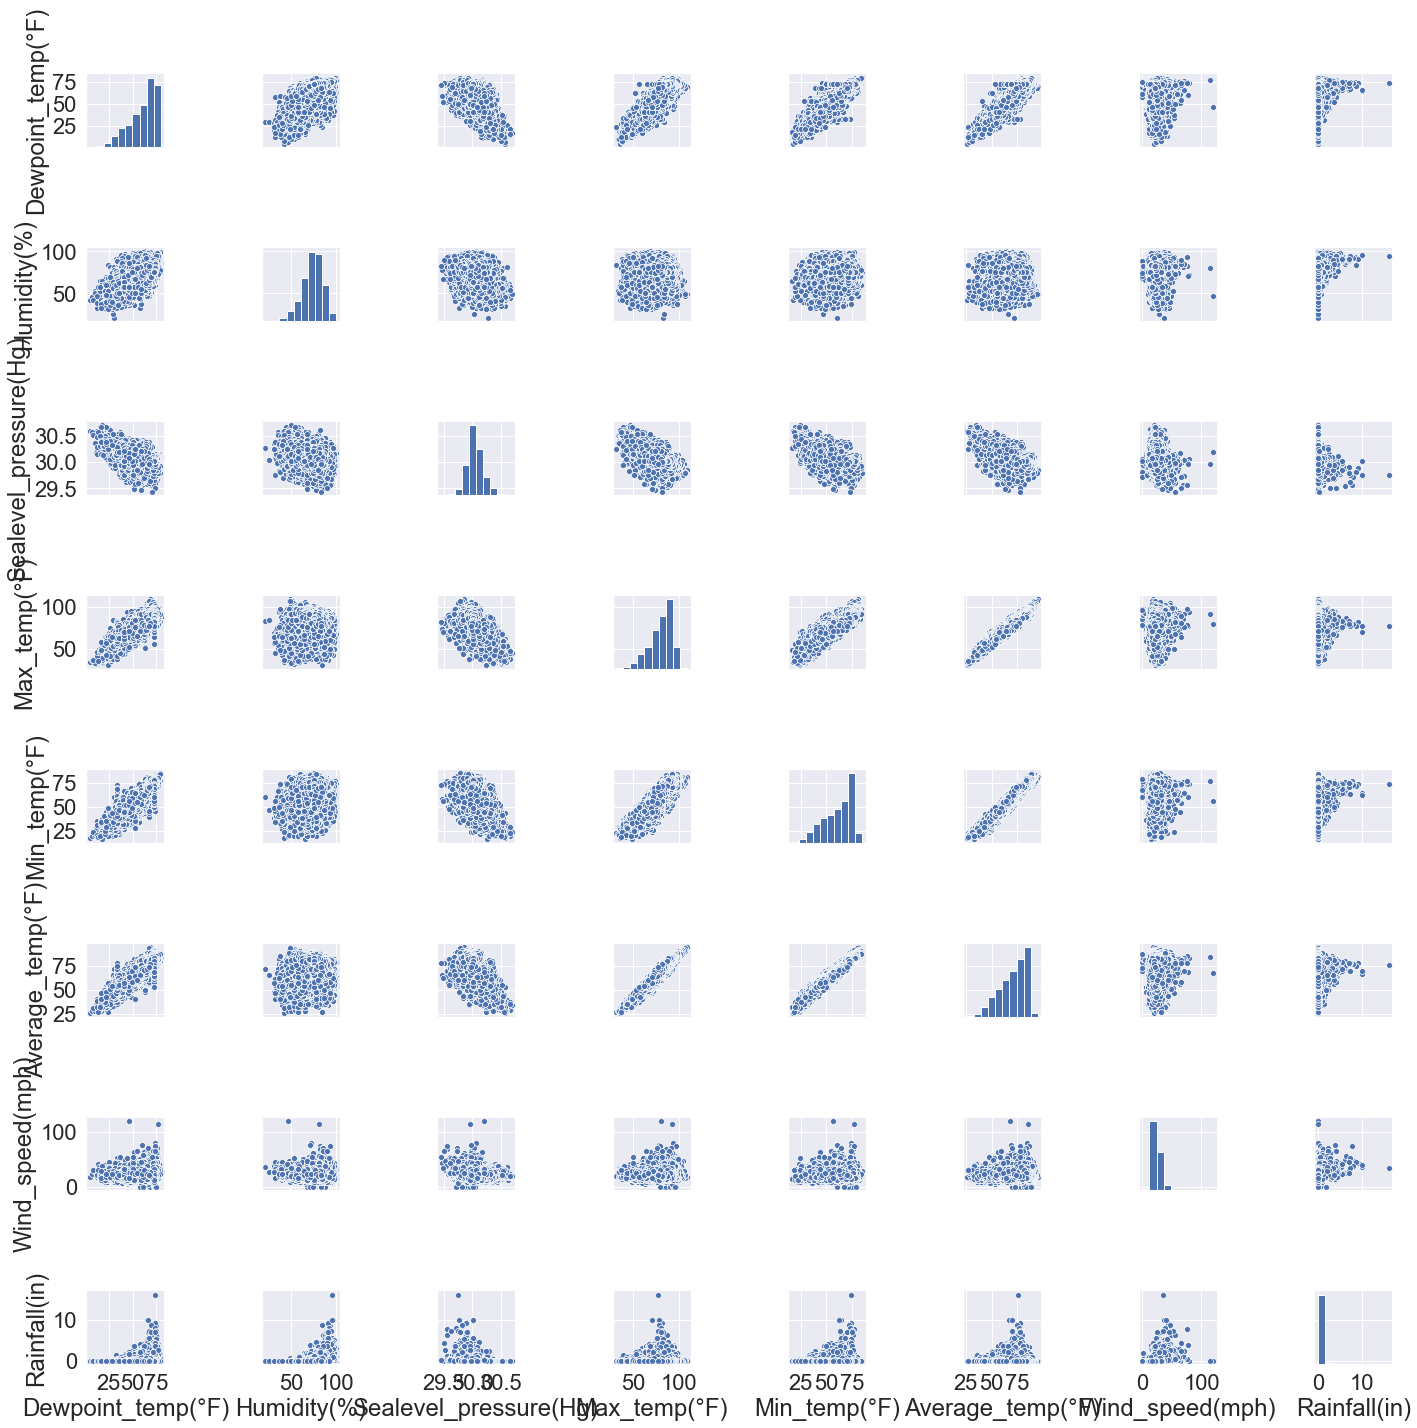

In [59]:
sns.pairplot(df)

In [60]:
fig = px.scatter(
    df_time.query("Year == 2015"),
    x="City",
    y="Max_temp(°F)",
    size="Rainfall(in)",
    color="Rainfall(in)",
    size_max = 50,
    hover_name="datetime",
    facet_col="Year",
    color_continuous_scale=px.colors.cyclical.IceFire,
)
fig.update_layout(
    title=go.layout.Title(
        text=""
    )
)
plt.figure(figsize=(105, 50))
fig.show()

<Figure size 7560x3600 with 0 Axes>

In [61]:
#save our new dataframes to be used in other aspects of our project
#df_time.to_csv('df_time.csv', index=False)
#df_rainfall.to_csv('df_rainfall.csv', index=False)
#df.to_csv('df_clean.csv', index=False)